In [1]:
def ensure_dir(dn):
    if not os.path.exists(dn):
        os.makedirs(dn)


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True



In [3]:
import glob, os
studydir = "."
datad  = os.path.join(studydir,"datain")
resd   = os.path.join(studydir,"ress")
imgdir = os.path.join(studydir,'qNML_images')
tbldir = os.path.join(studydir,"tables")

ensure_dir(imgdir)
ensure_dir(tbldir)

scoretypes = [os.path.split(d)[-1] for d in glob.glob(os.path.join(resd,'*'))]
scoretypes = sorted(scoretypes,key=str.upper)
datanames = open(os.path.join(studydir,"datasR.txt")).read().split()

def get_resd(st,dd):
    return os.path.join(resd,st,dd)

def u1(x):
    return x[0].upper()+x[1:]

def fmt_dn(dn):
    return ''.join(map(u1,dn.split('_')))[:7]
scoretypes, datanames

(['BDeu', 'BIC', 'fNML', 'qNML'],
 ['adult',
  'wine',
  'heart_statlog',
  'heart_hungarian',
  'heart_cleveland',
  'page_blocks',
  'glass',
  'bc_wisconsin',
  'tic_tac_toe',
  'shuttle',
  'breast_cancer',
  'yeast',
  'post_operative',
  'diabetes',
  'abalone',
  'ecoli',
  'liver',
  'thyroid',
  'iris',
  'balance'])

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np

A slow test to check that everything is ok

In [6]:

def onereptest(st,dn,r):
    resfn = os.path.join(resd,st,dn,"%d.ssp"%r)
    a = np.fromfile(resfn,sep=' ')
    return a.shape == (19*4,)

def allreptest():
    for (dix, dn) in enumerate(datanames):
        for (six, st) in enumerate(scoretypes):
            for r in  xrange(1000):
                try:
                    if not onereptest(st,dn,r):
                        print(st, dn, r)
                except:
                    pass

Load one prediction column

In [6]:
import numpy as np

def gen_resfiles(st,dn):
    return glob.glob(os.path.join(resd,st,dn,'*.ssp'))

def onerep(resfn,col):
        a = np.fromfile(resfn,sep=' ').reshape(-1,5)
        return a[:,col]

qsubtmpl="qsub -N %s.%s -o /dev/null -e qNMLerr.txt run1overss.sh %s %s"

def gen_stack(st,dn,col,verbose=False):
    for rfn in gen_resfiles(st,dn):
        try:
            yield onerep(rfn,col)
        except:
            if verbose:
                print('Error in ',rfn)
                r = os.path.basename(rfn).split('.')[0]
                print(qsubtmpl%(dn,r,dn,r))
    
def one_dat(st,dn,col,verbose=False):
    return np.vstack(list(gen_stack(st,dn,col,verbose)))

one_dat('fNML','wine',3).shape

(1000, 9)

## Predictive performance by sample size (average over 1000 train and test runs) 

In [7]:
lstyle = {'BIC':'-.', 'BDeu':':', 'fNML':'--', 'qNML':'-'}

In [8]:
def get_sample_sizes(dn):
    ssfile = gen_resfiles('fNML',dn)[0]
    return np.array([l.split()[0] for l in open(ssfile)],dtype=int)


In [9]:
datas={}
for dn in datanames:
    for st in scoretypes:
        for col in (2,3,4):
            print (dn,st,col)
            datas[(st,dn,col)] = one_dat(st,dn,col)


adult BDeu 2
adult BDeu 3
adult BDeu 4
adult BIC 2
adult BIC 3
adult BIC 4
adult fNML 2
adult fNML 3
adult fNML 4
adult qNML 2
adult qNML 3
adult qNML 4
wine BDeu 2
wine BDeu 3
wine BDeu 4
wine BIC 2
wine BIC 3
wine BIC 4
wine fNML 2
wine fNML 3
wine fNML 4
wine qNML 2
wine qNML 3
wine qNML 4
heart_statlog BDeu 2
heart_statlog BDeu 3
heart_statlog BDeu 4
heart_statlog BIC 2
heart_statlog BIC 3
heart_statlog BIC 4
heart_statlog fNML 2
heart_statlog fNML 3
heart_statlog fNML 4
heart_statlog qNML 2
heart_statlog qNML 3
heart_statlog qNML 4
heart_hungarian BDeu 2
heart_hungarian BDeu 3
heart_hungarian BDeu 4
heart_hungarian BIC 2
heart_hungarian BIC 3
heart_hungarian BIC 4
heart_hungarian fNML 2
heart_hungarian fNML 3
heart_hungarian fNML 4
heart_hungarian qNML 2
heart_hungarian qNML 3
heart_hungarian qNML 4
heart_cleveland BDeu 2
heart_cleveland BDeu 3
heart_cleveland BDeu 4
heart_cleveland BIC 2
heart_cleveland BIC 3
heart_cleveland BIC 4
heart_cleveland fNML 2
heart_cleveland fNML 3
hea

In [10]:
def ss_image(ylabel,col,f,outname):
    for (dix, dn) in enumerate(datanames):
        plt.figure(figsize=(12,6))
        plt.rcParams.update({'font.size':22})
        ss = get_sample_sizes(dn)
        plt.title(fmt_dn(dn))
        plt.xlabel('Sample size')
        plt.ylabel(ylabel)
        for (six, st) in enumerate(scoretypes):
            ds = datas[(st,dn,col)]
            plt.plot(ss,f(ds,axis=0),lw=4,linestyle=lstyle[st],label=st)
        plt.legend(loc='best')
        plt.savefig(imgdir+'/%s_%s.pdf' % (dn,outname), bbox_inches='tight')
        

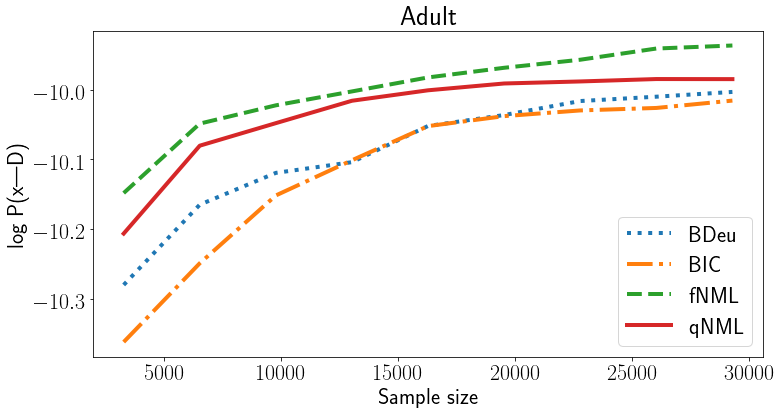

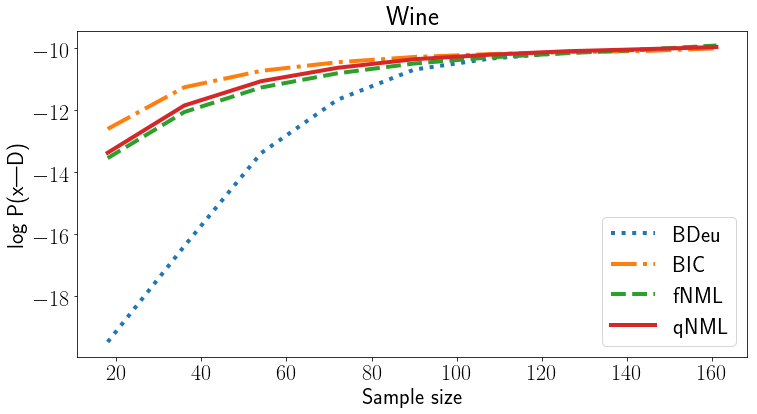

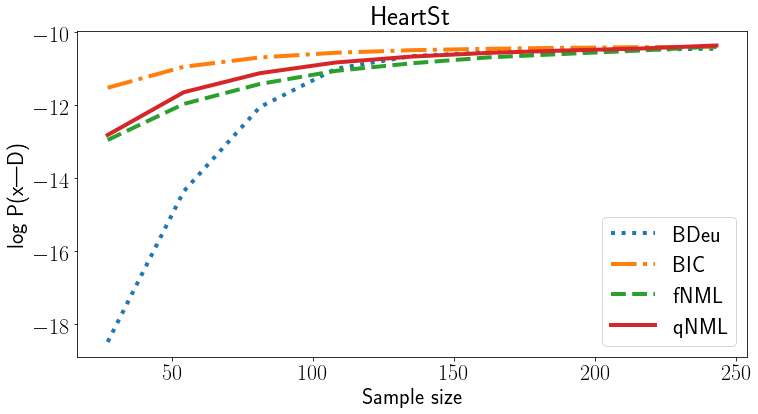

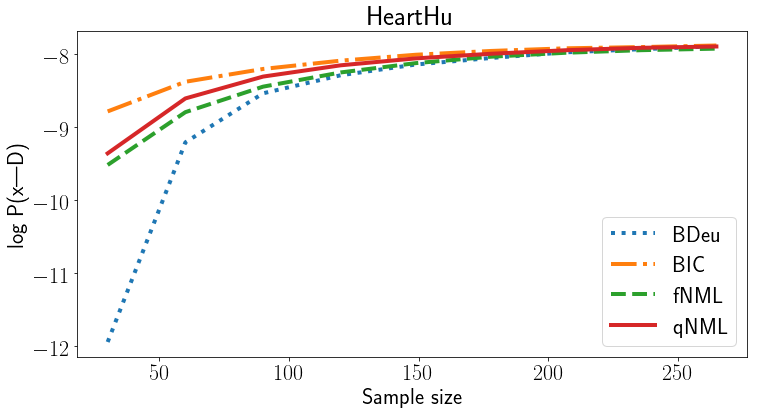

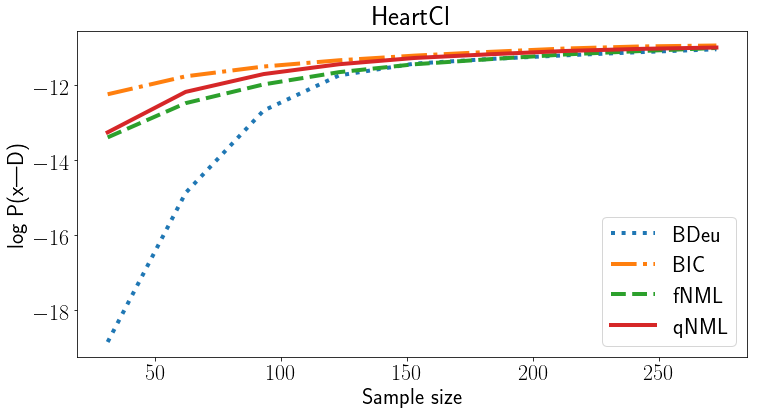

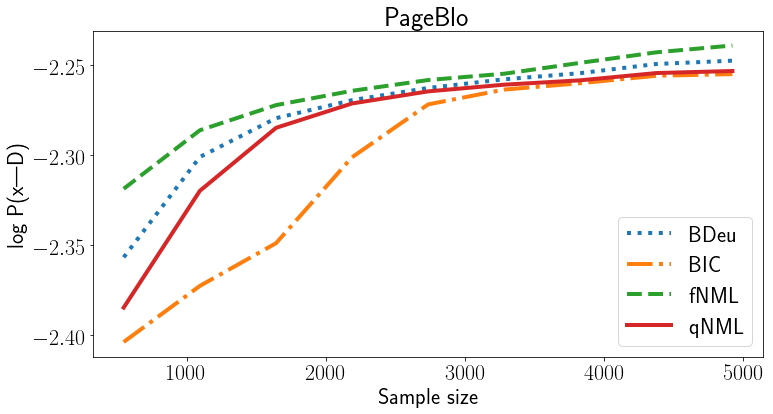

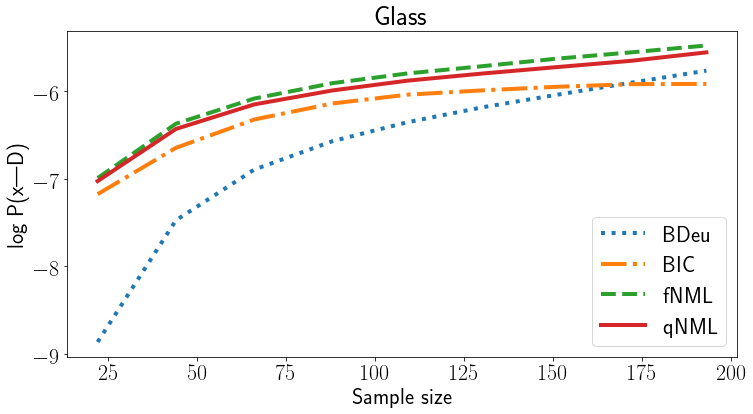

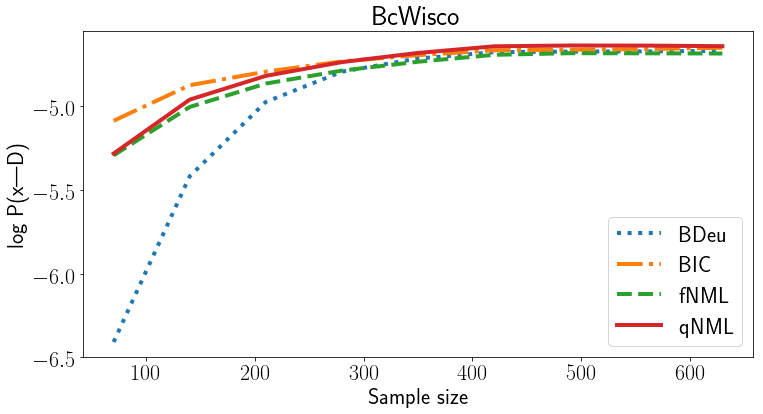

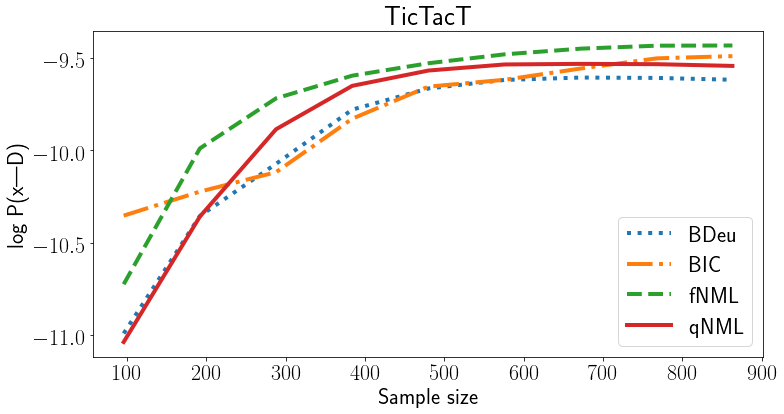

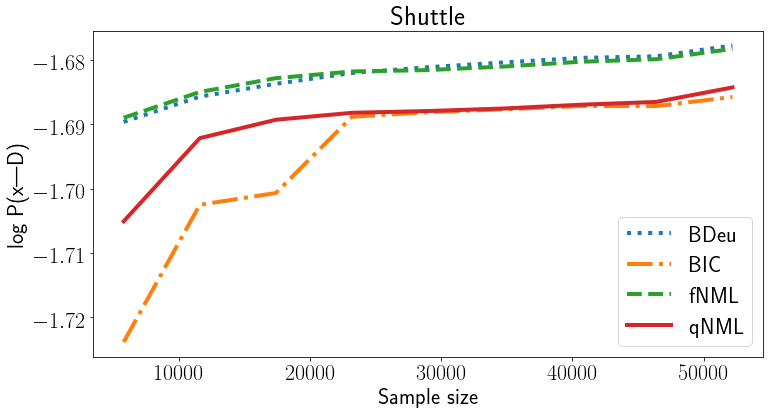

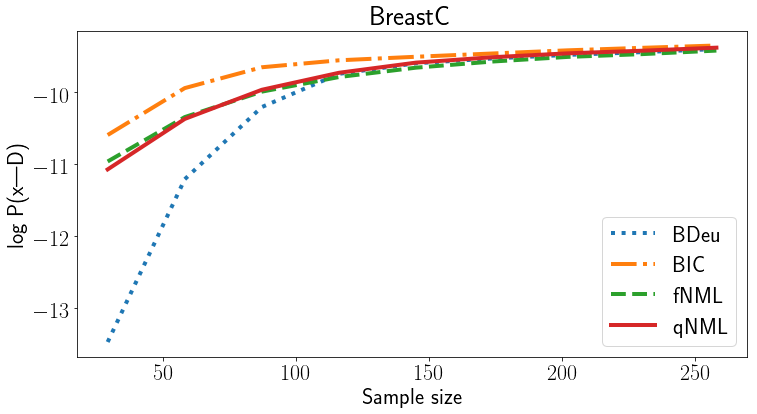

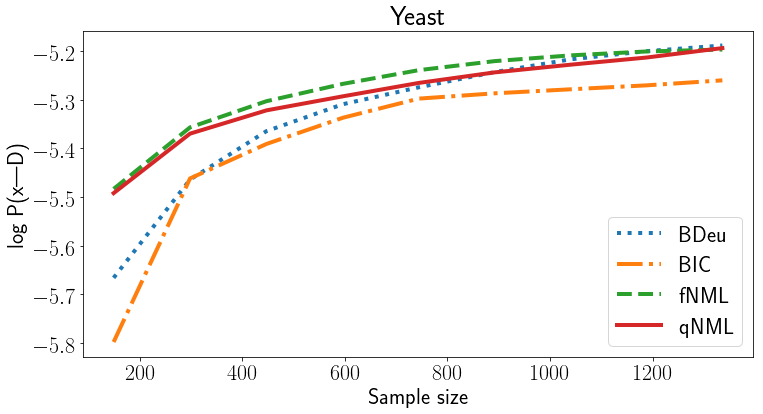

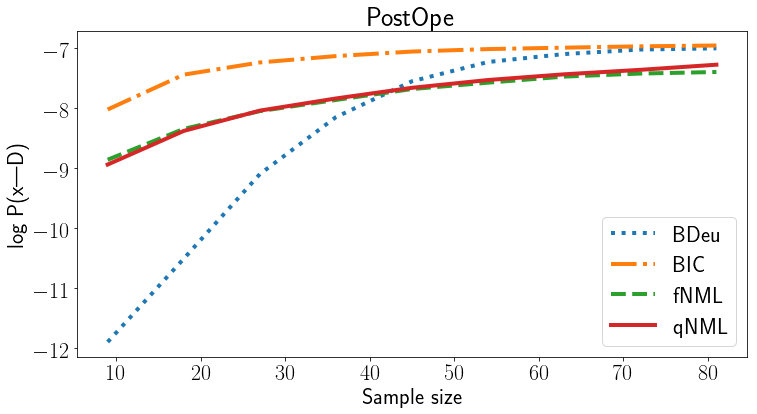

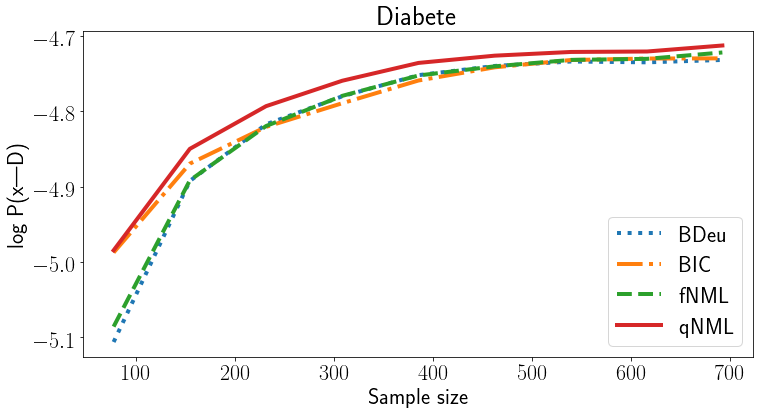

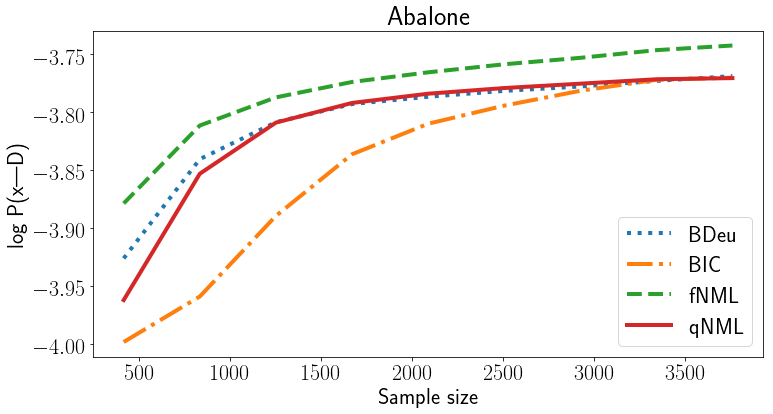

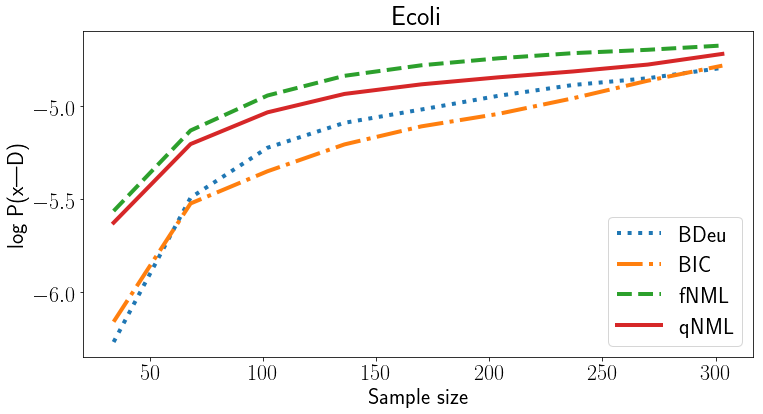

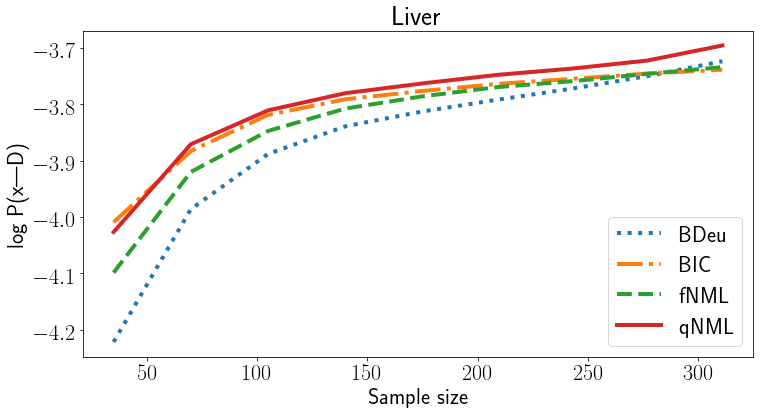

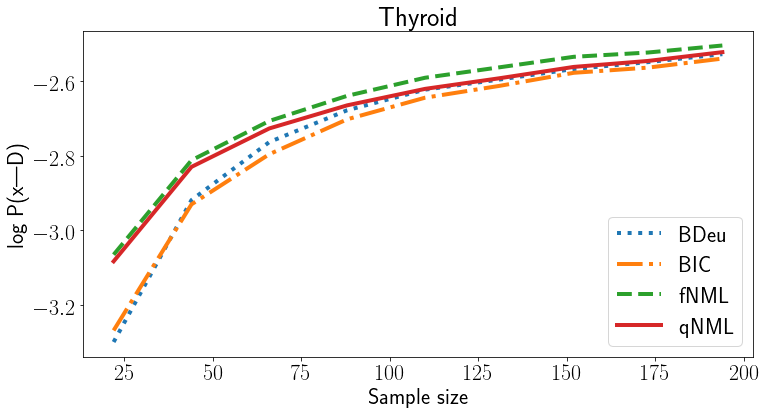

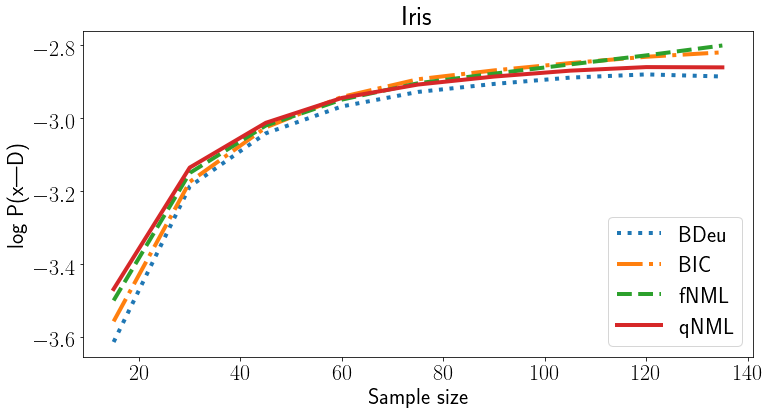

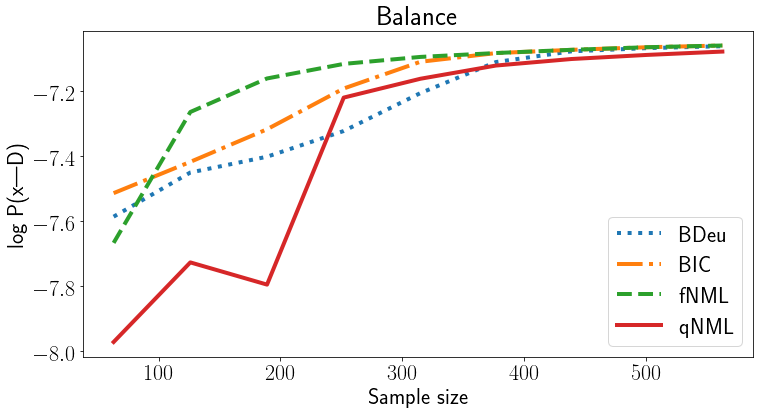

In [11]:
ss_image('log P(x|D)',3,np.mean,'predmean')

## Variance of predictions too

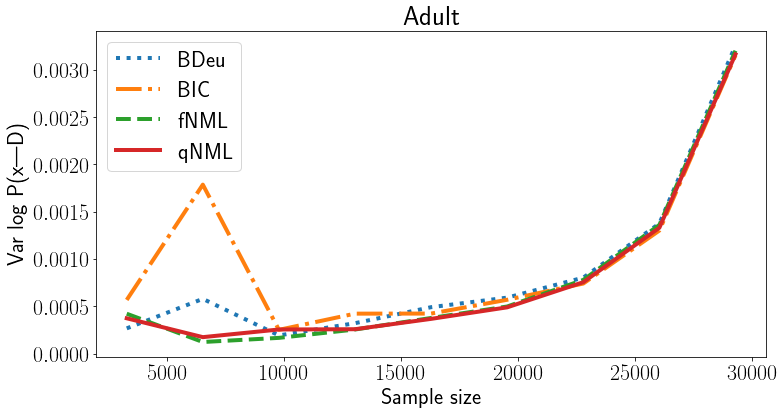

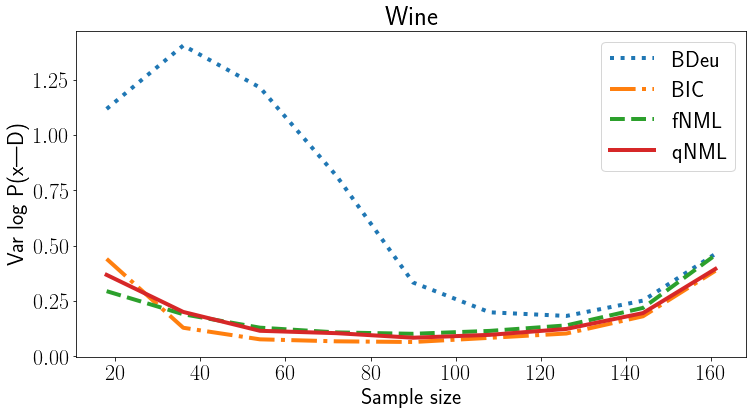

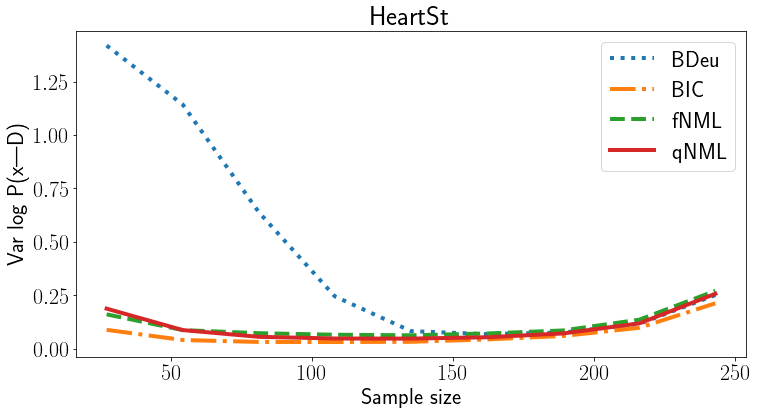

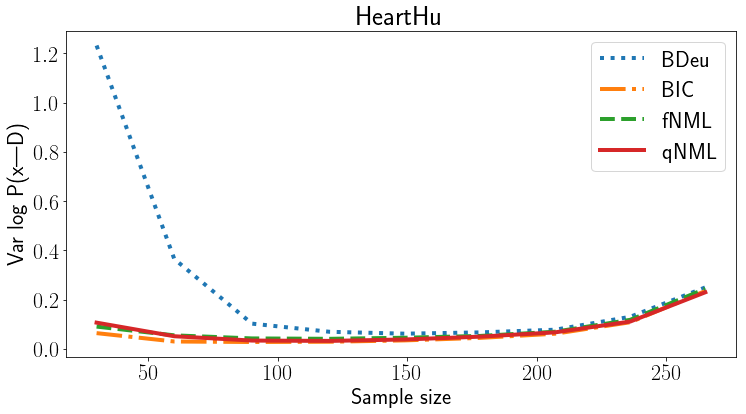

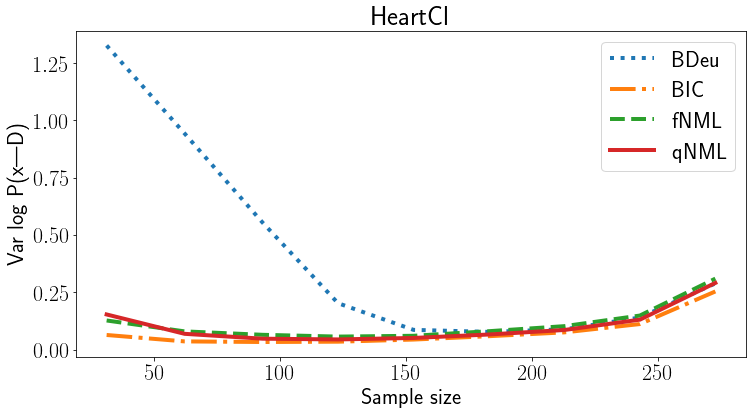

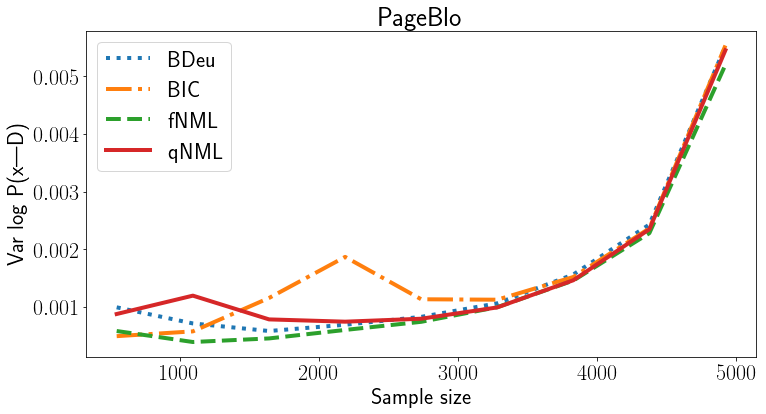

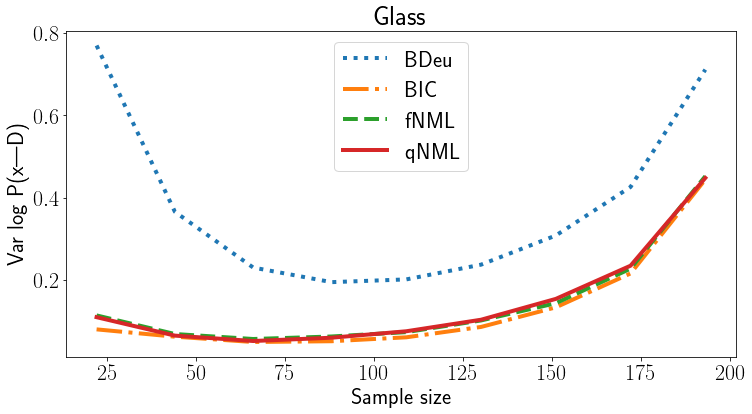

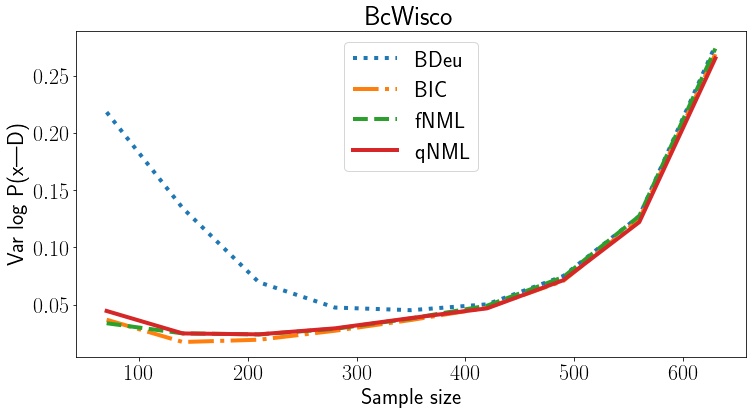

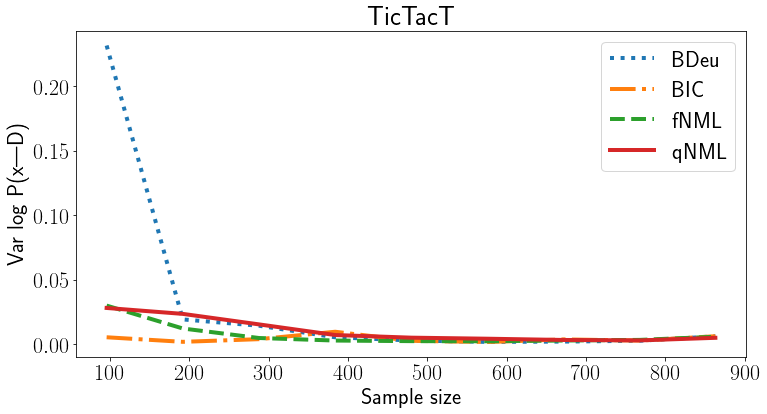

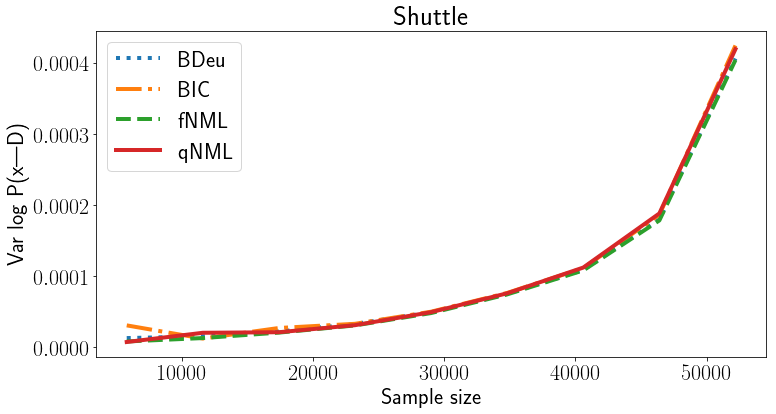

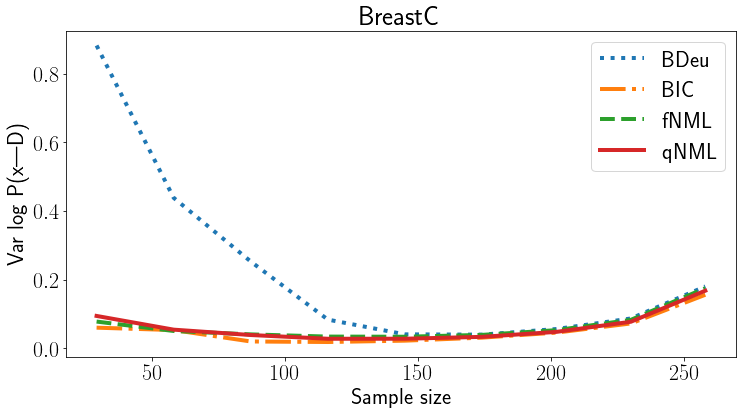

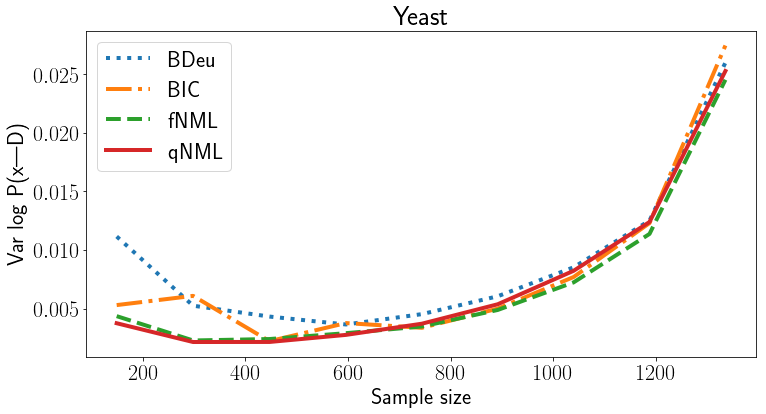

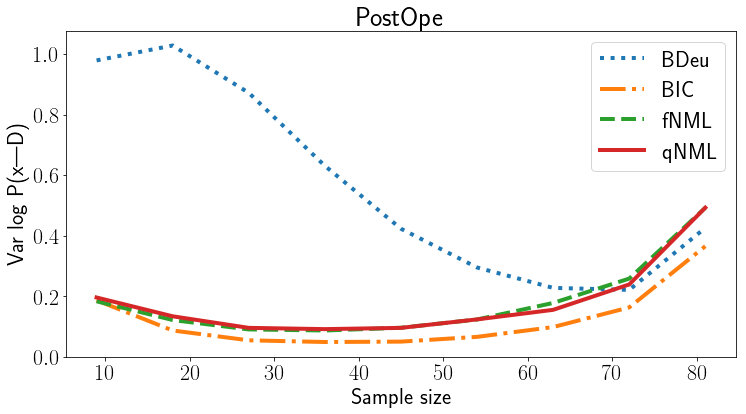

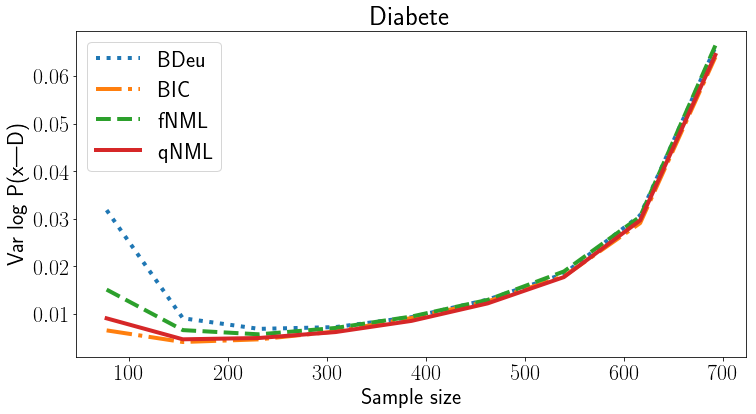

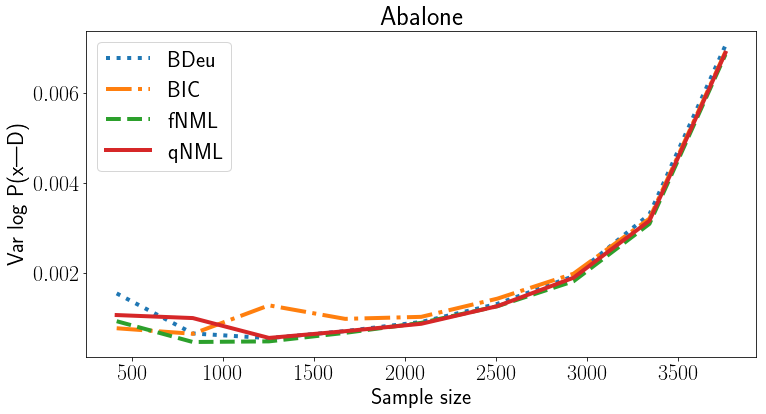

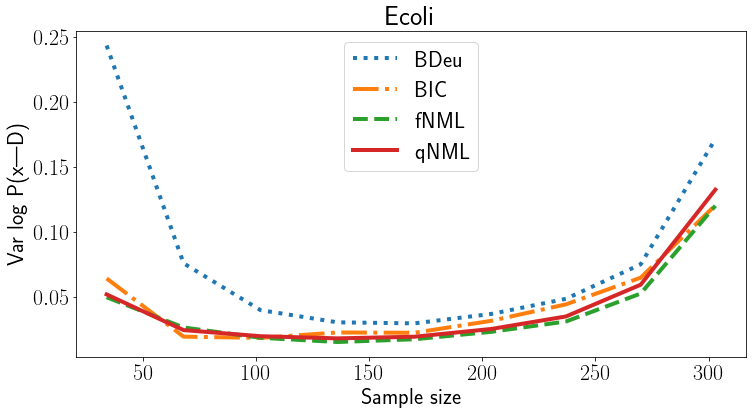

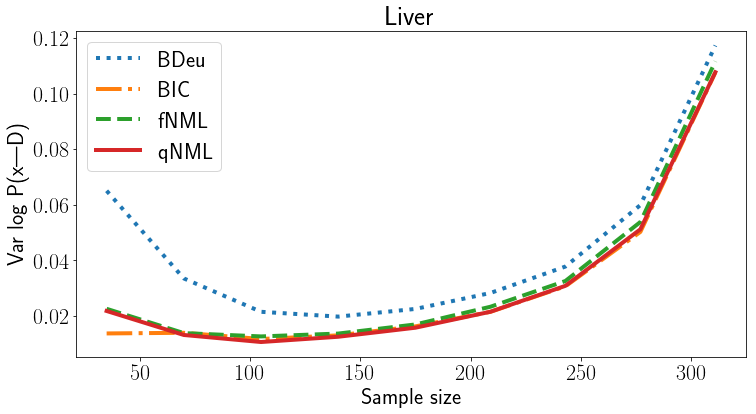

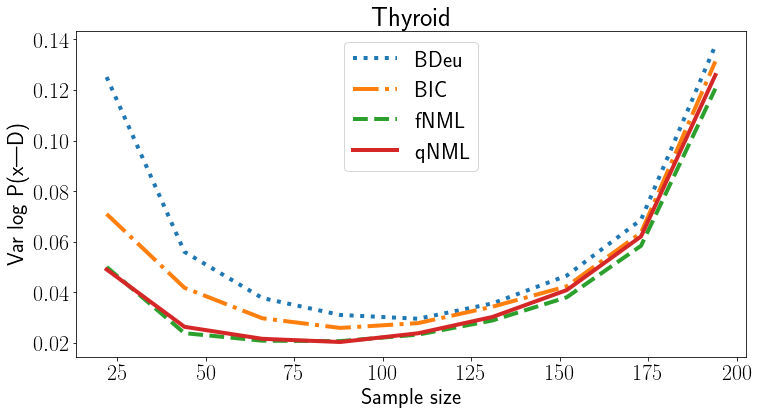

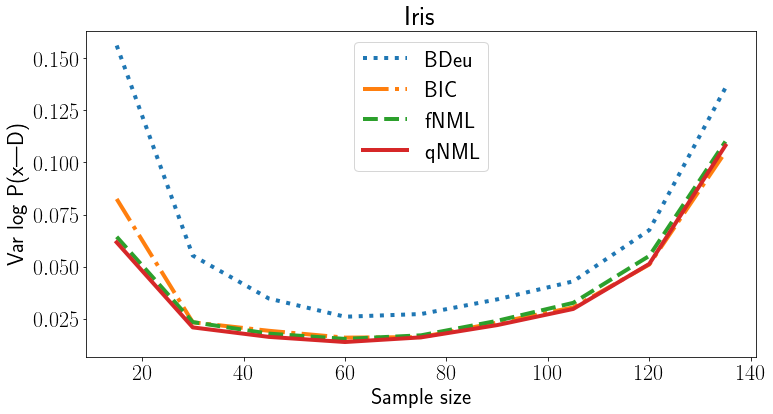

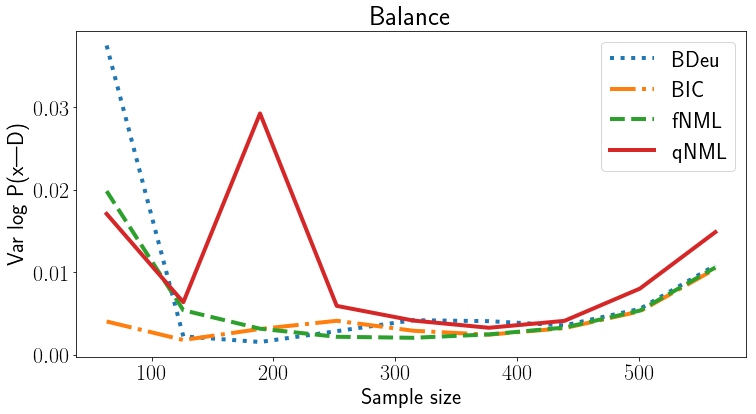

In [12]:
ss_image('Var log P(x|D)',3,np.var,'predvar')

### Number of parameters

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

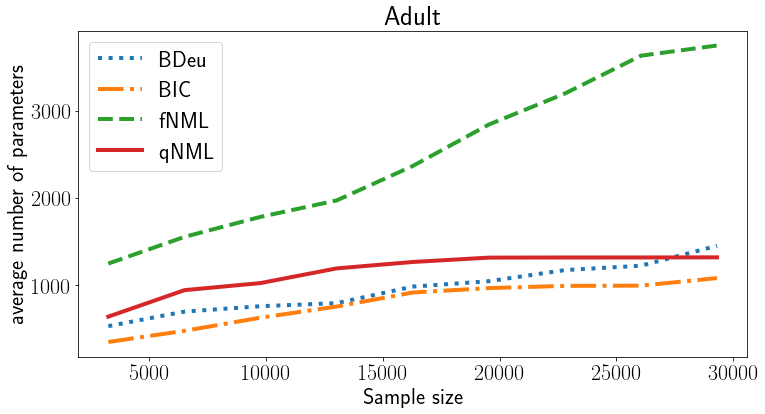

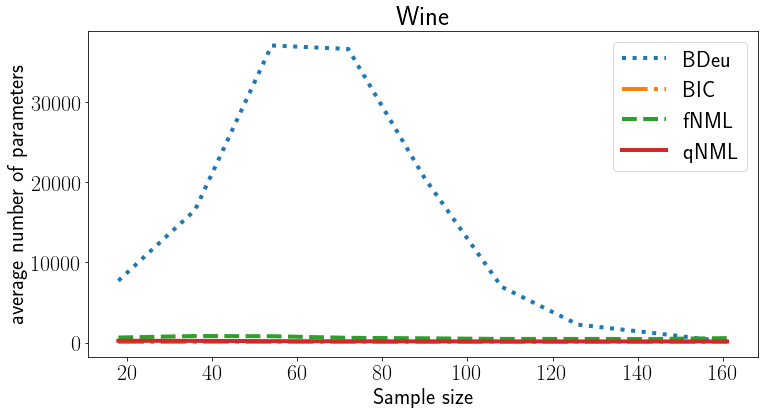

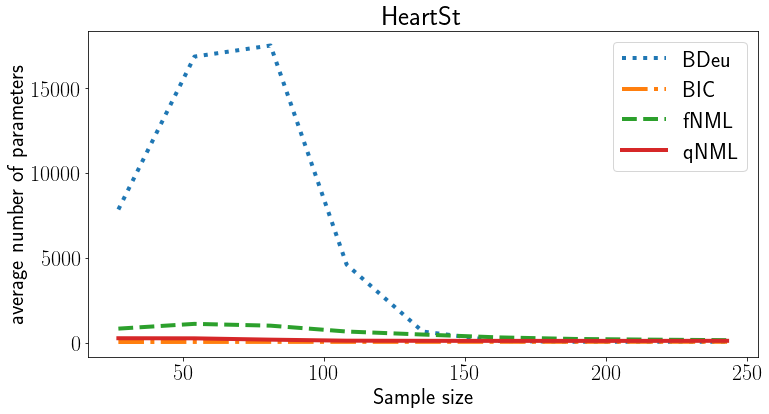

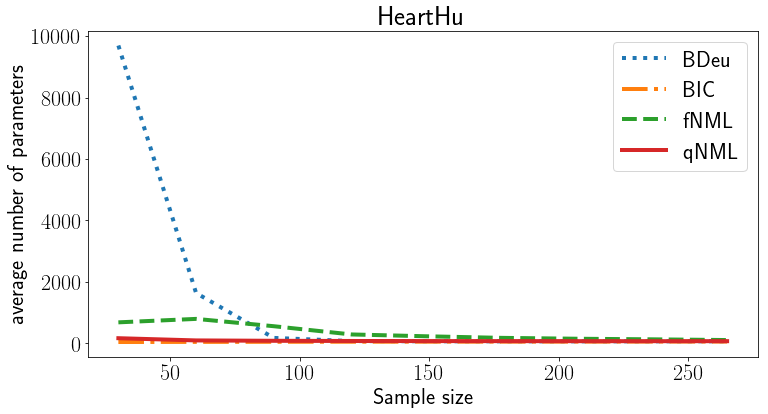

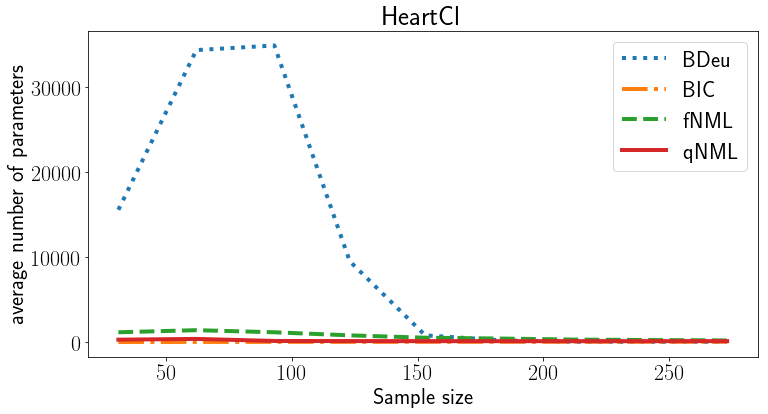

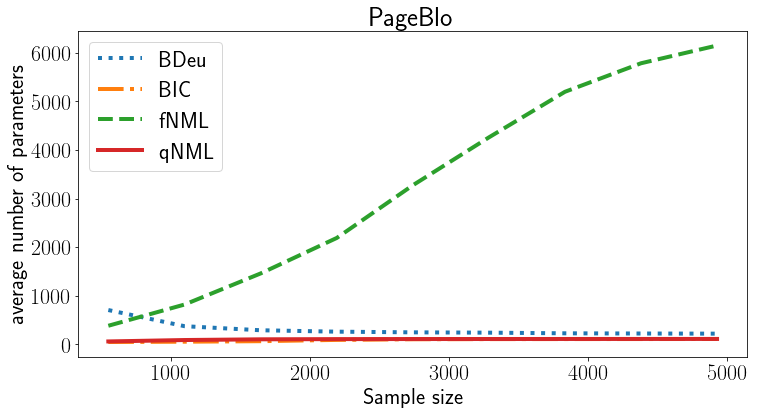

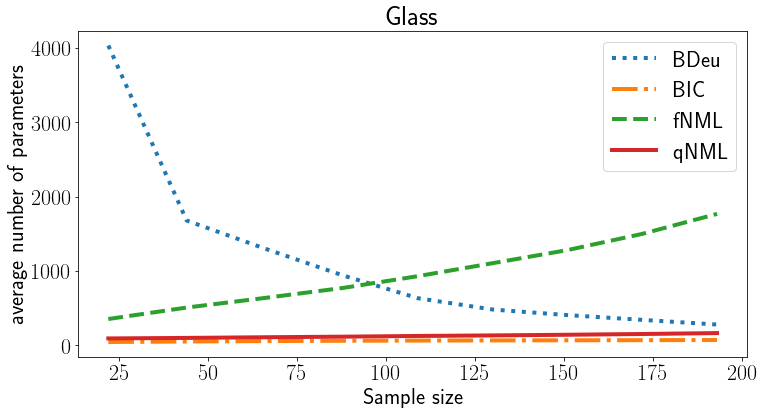

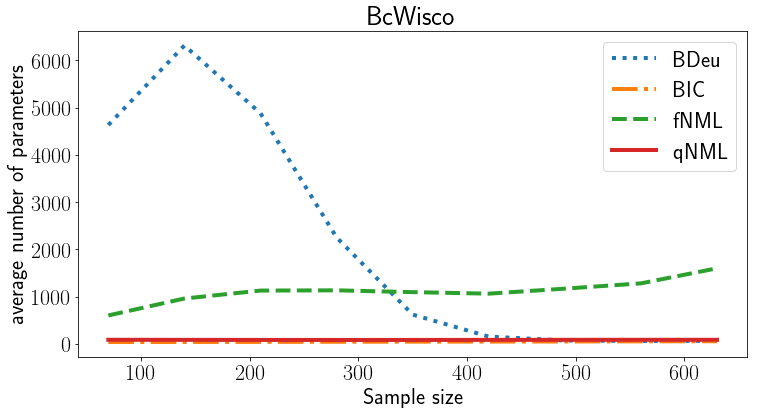

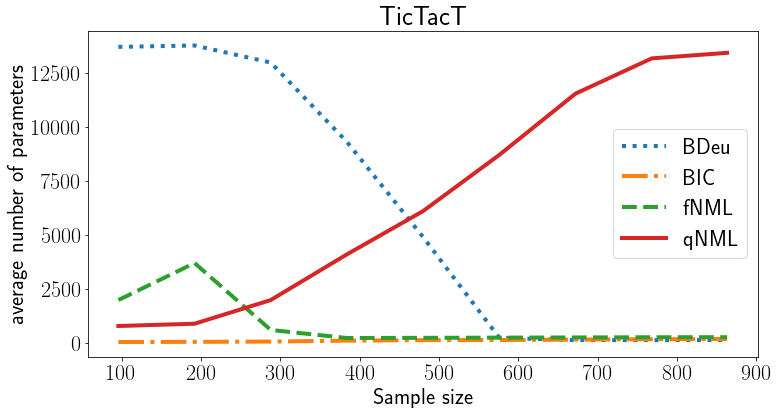

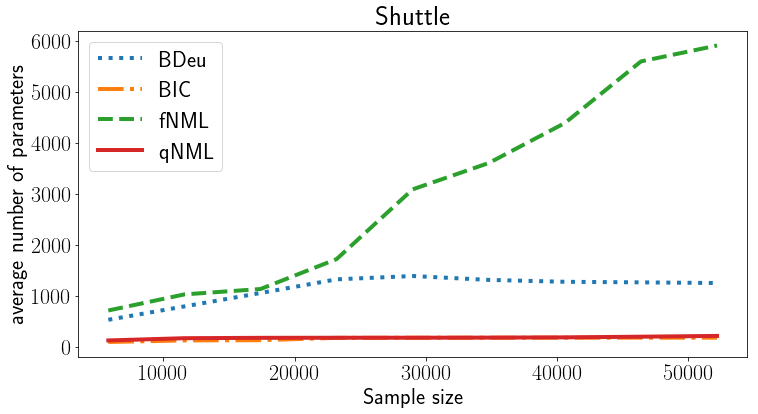

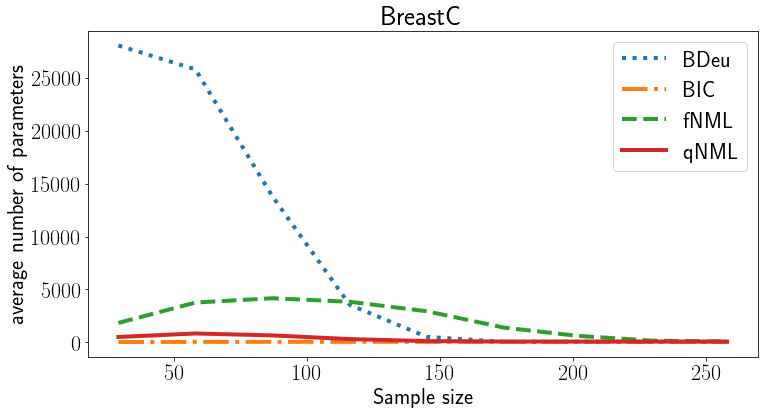

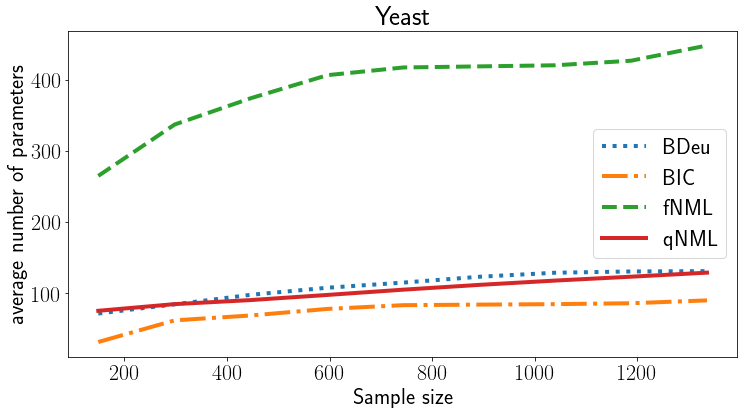

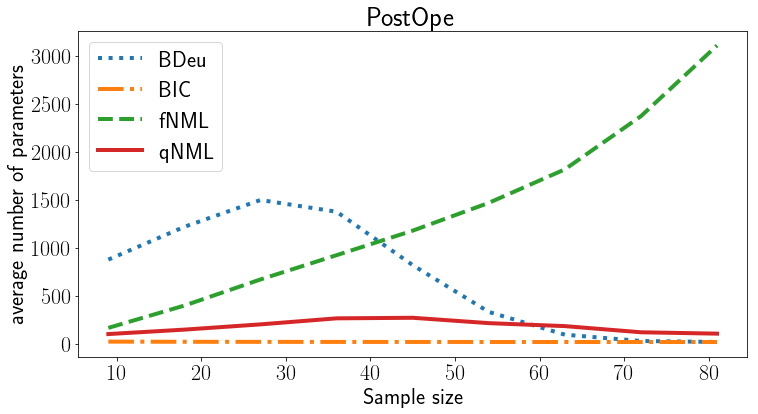

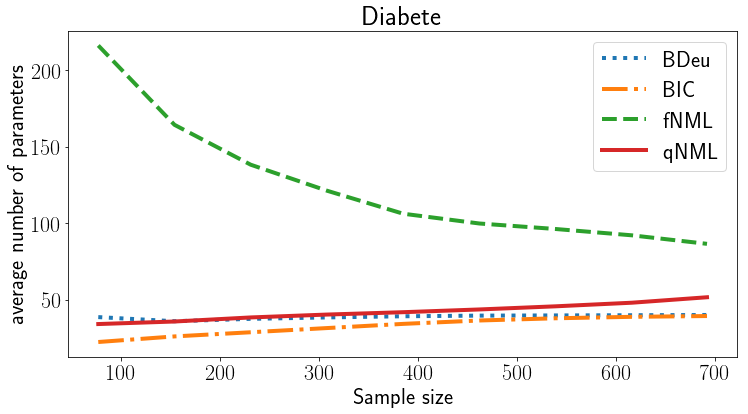

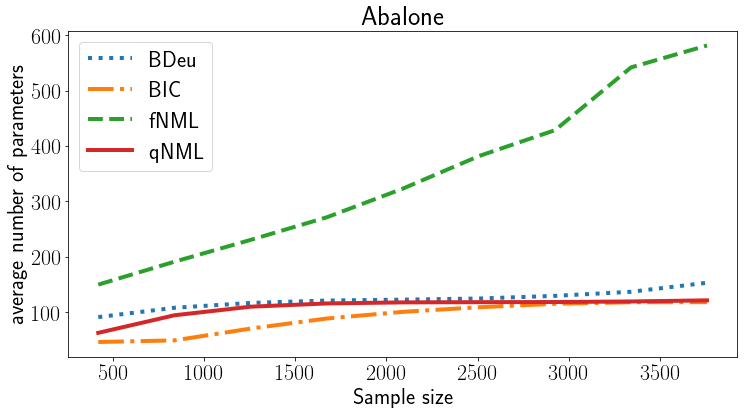

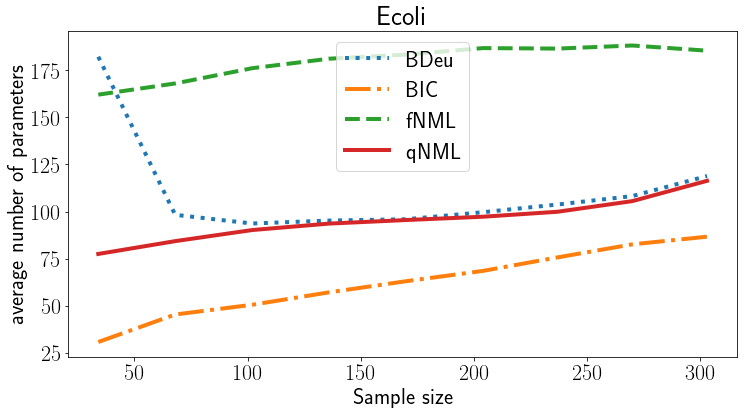

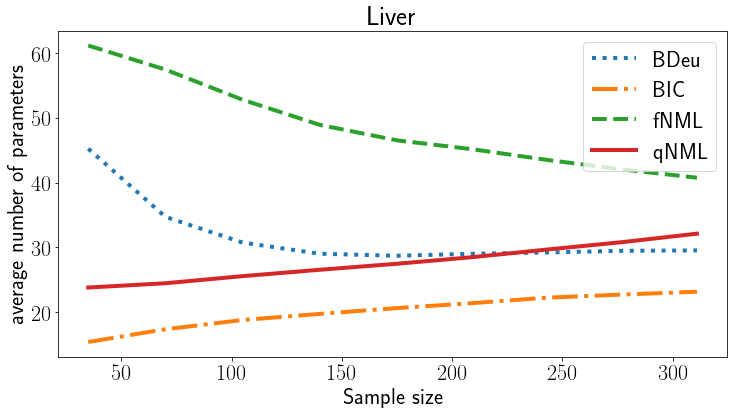

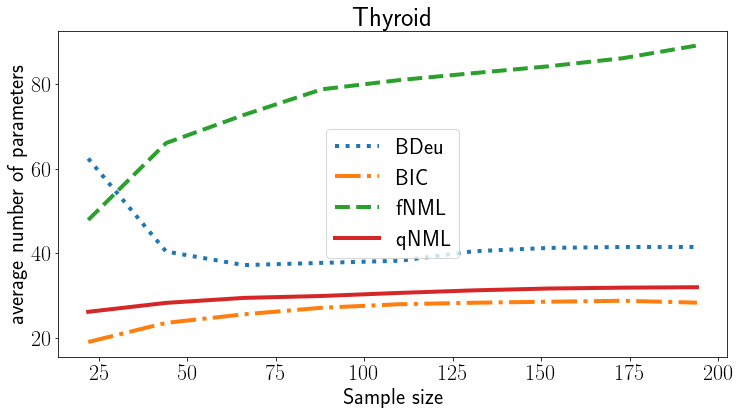

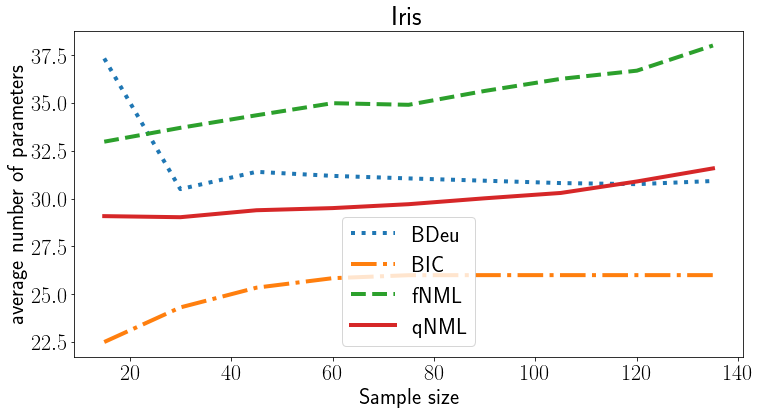

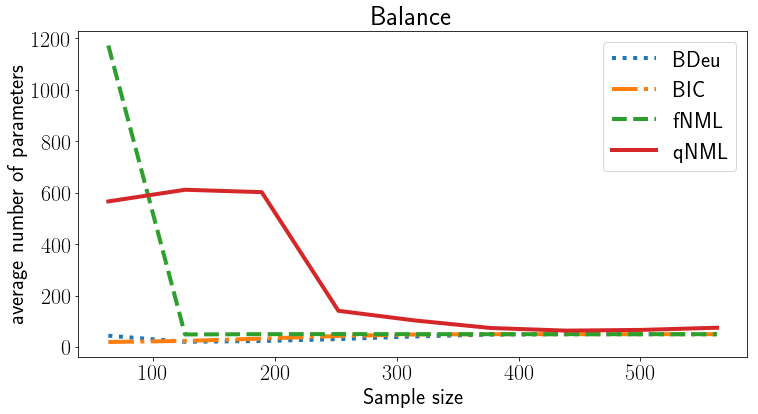

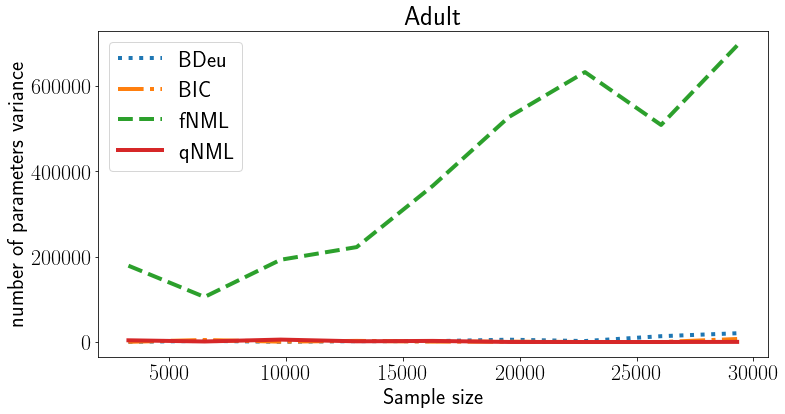

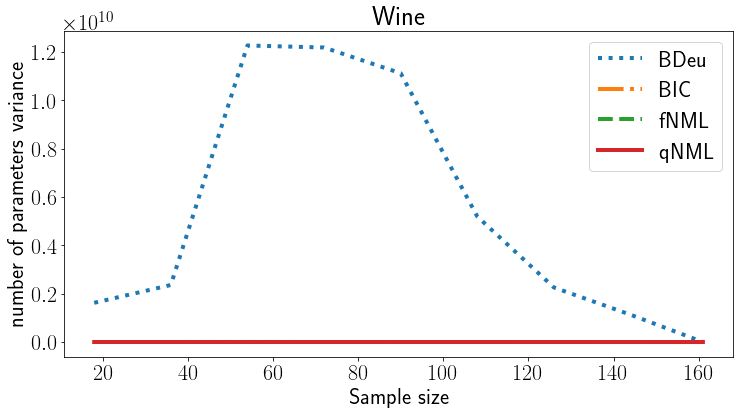

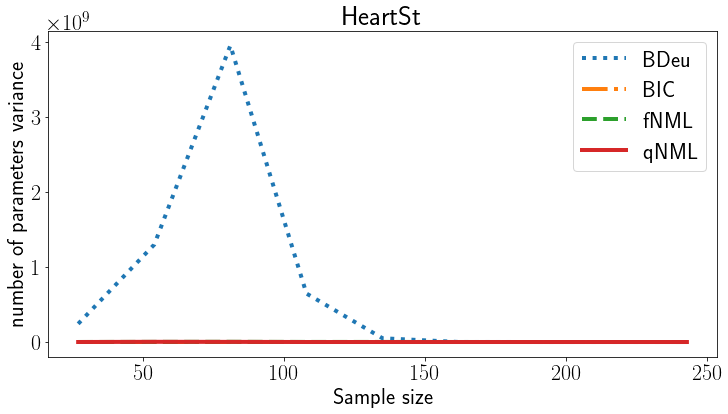

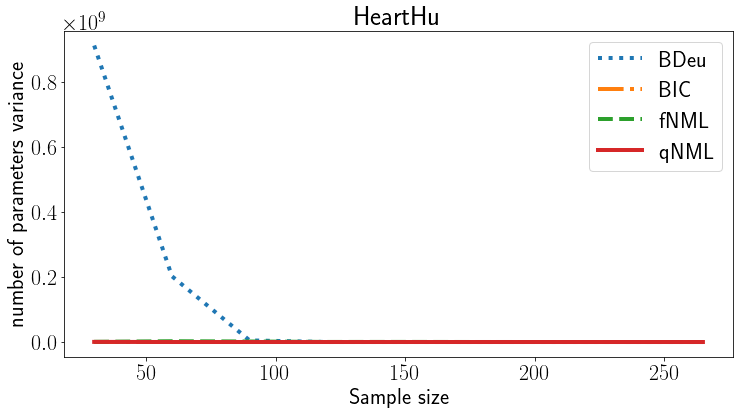

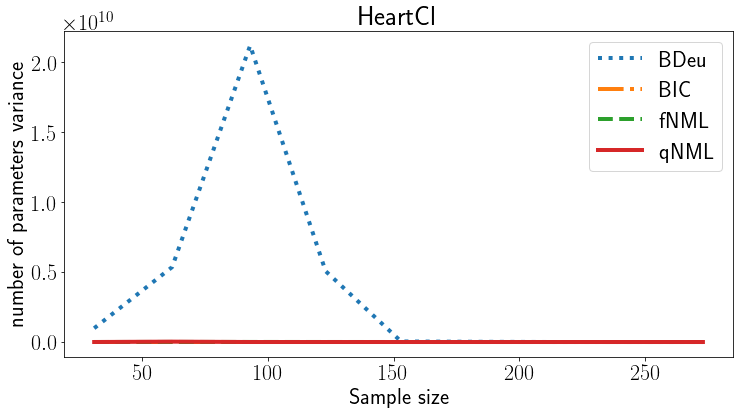

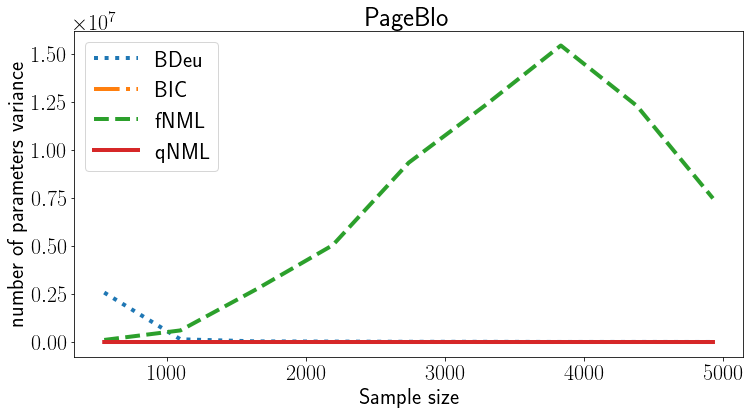

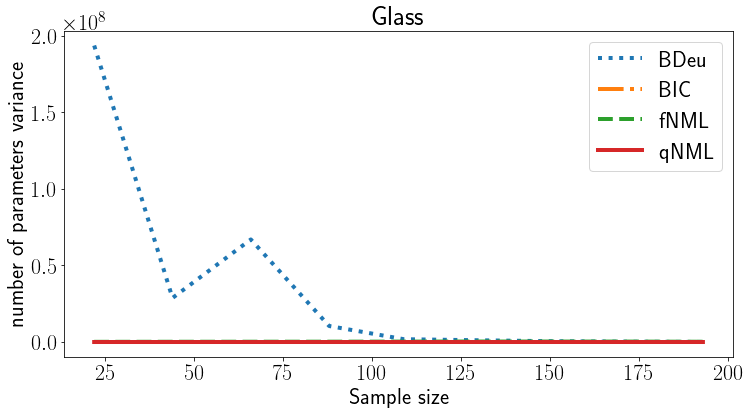

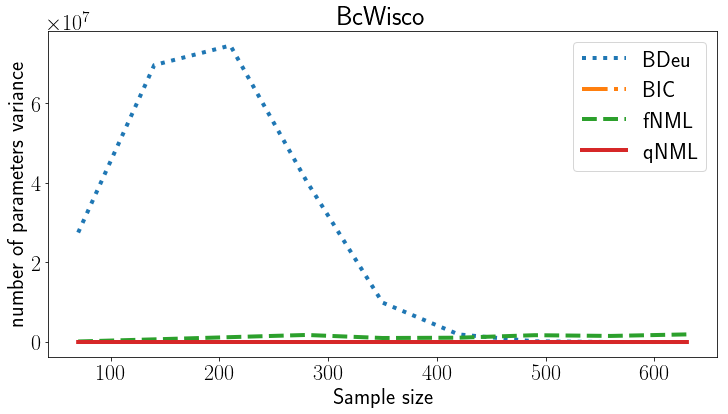

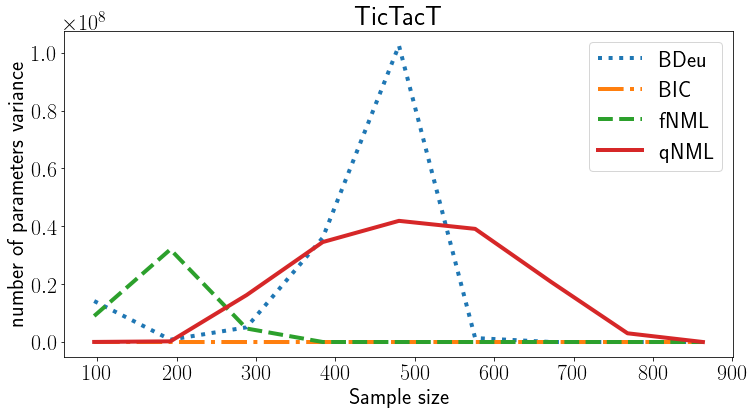

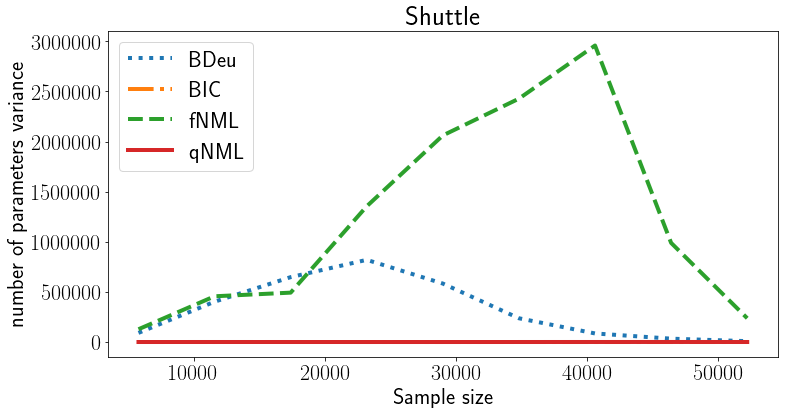

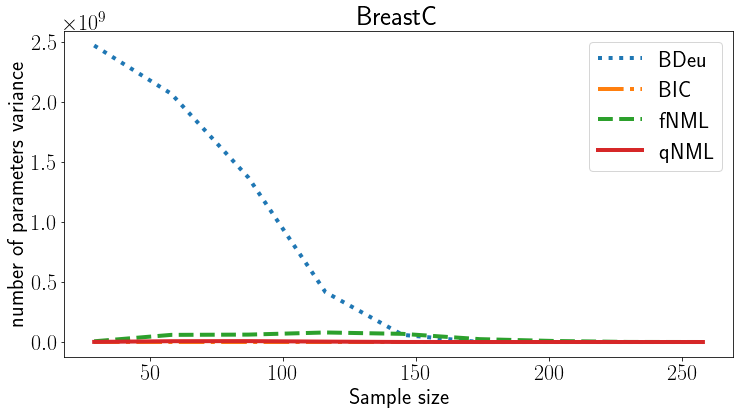

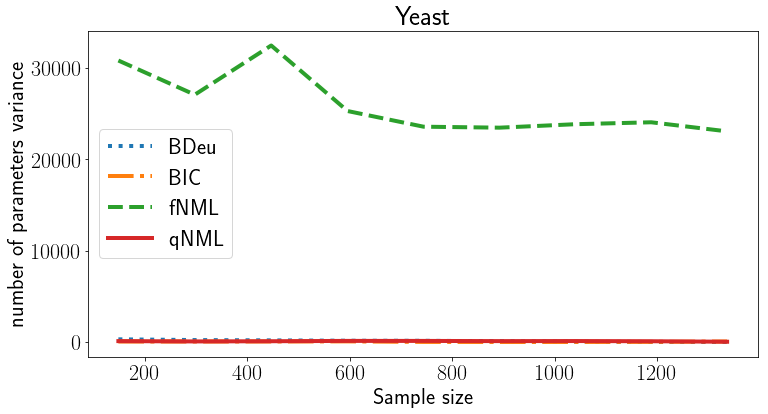

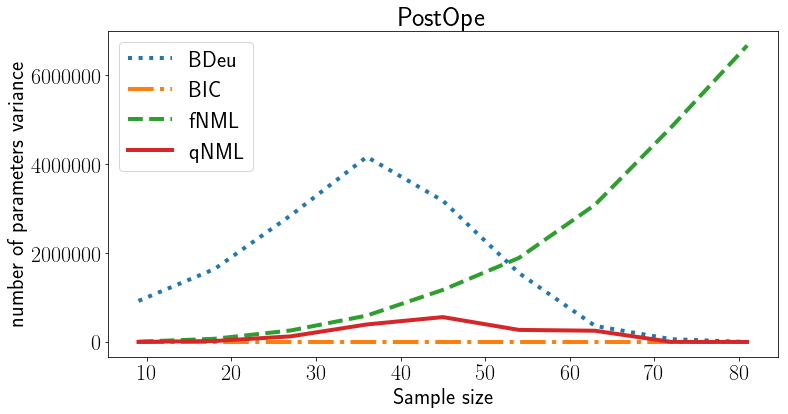

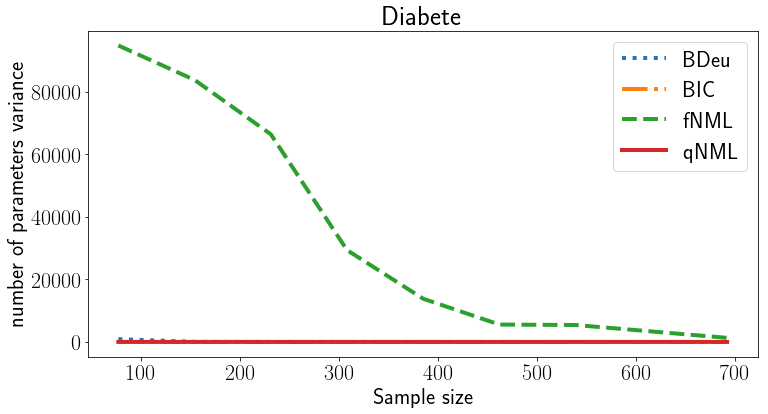

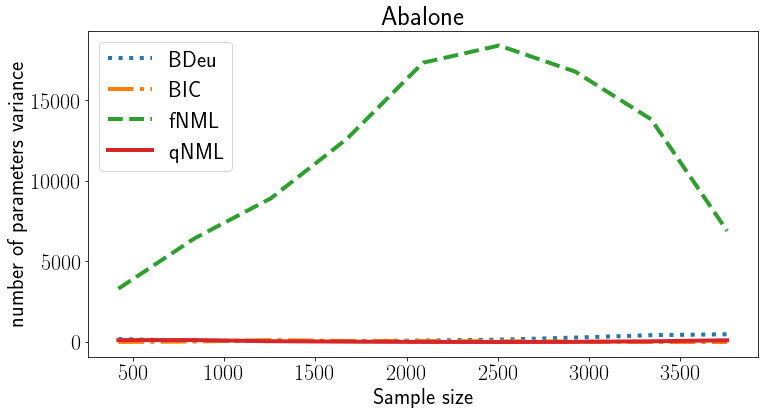

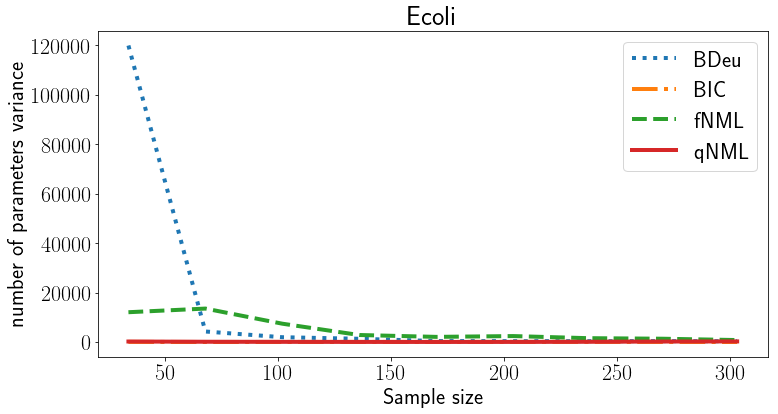

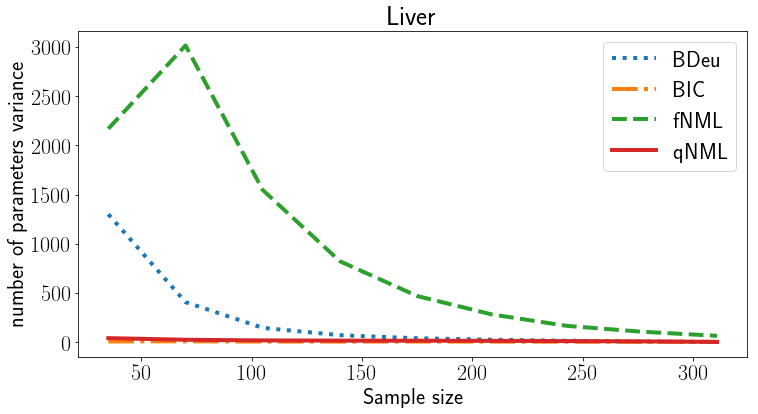

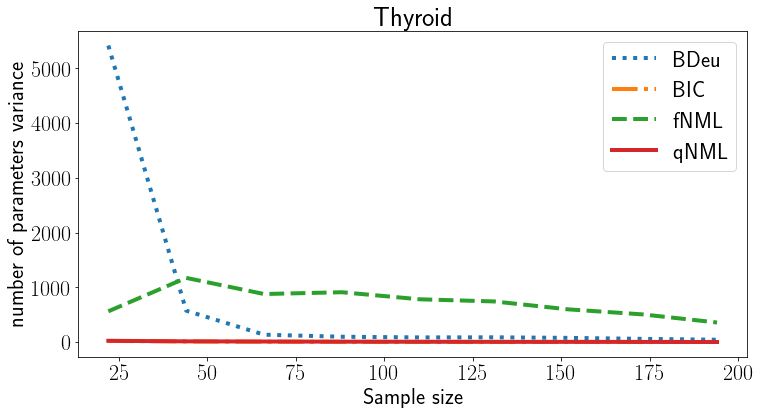

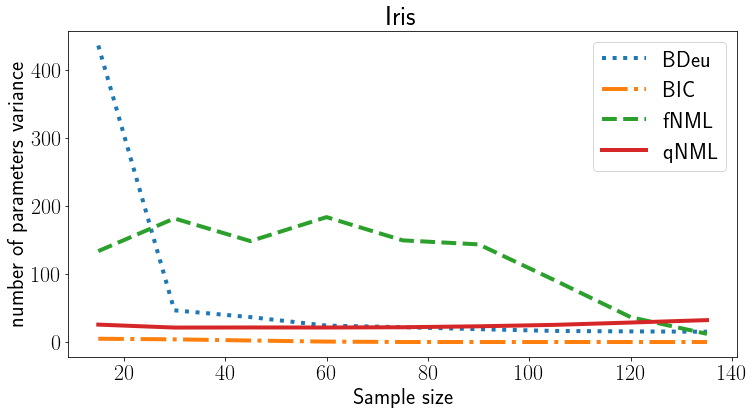

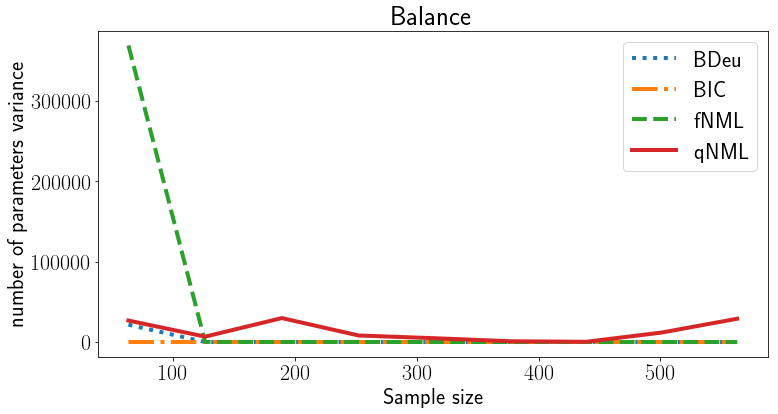

In [13]:
ss_image('average number of parameters',2,np.mean,'npmean')
ss_image('number of parameters variance',2,np.var,'npvar')

### Number of parents

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

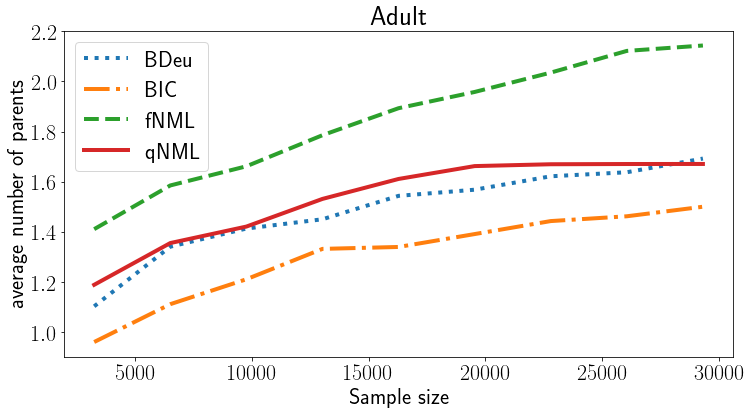

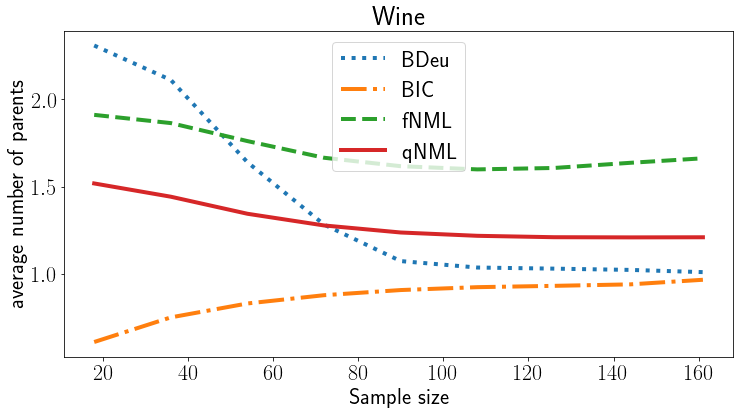

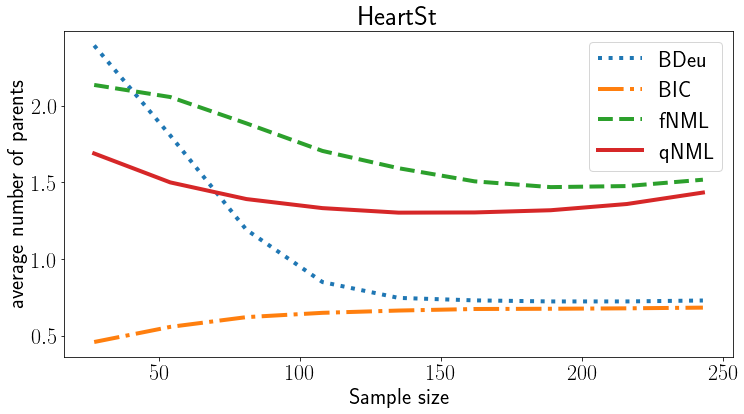

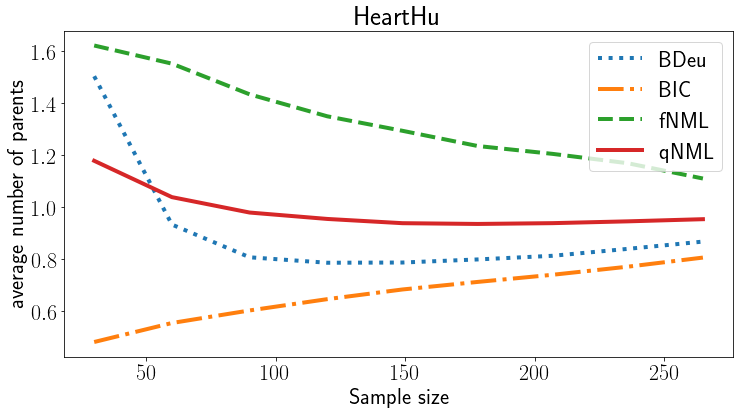

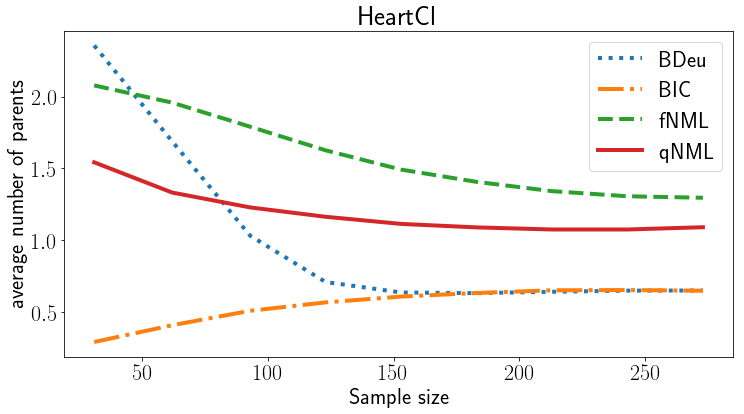

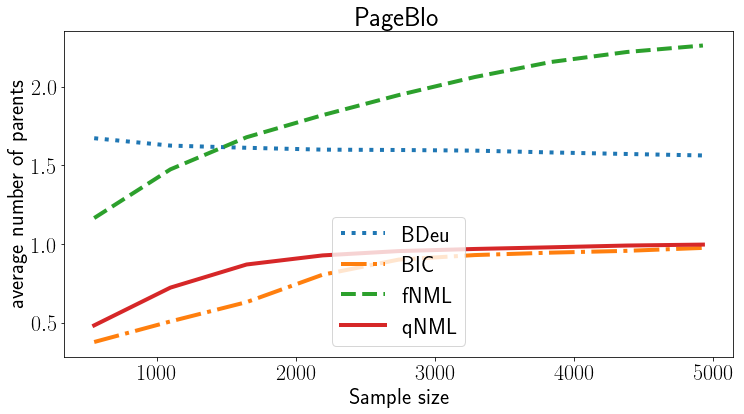

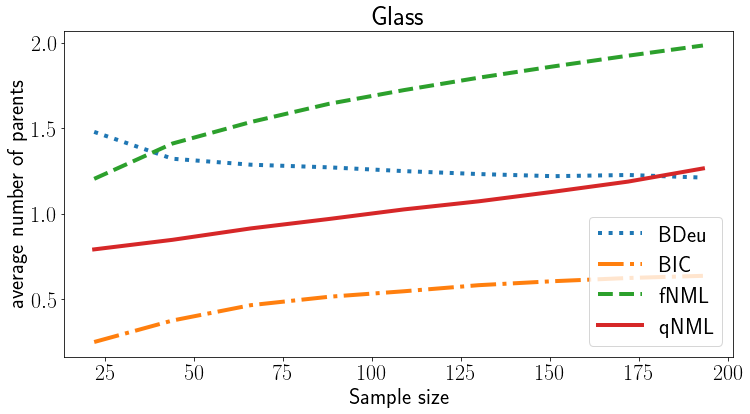

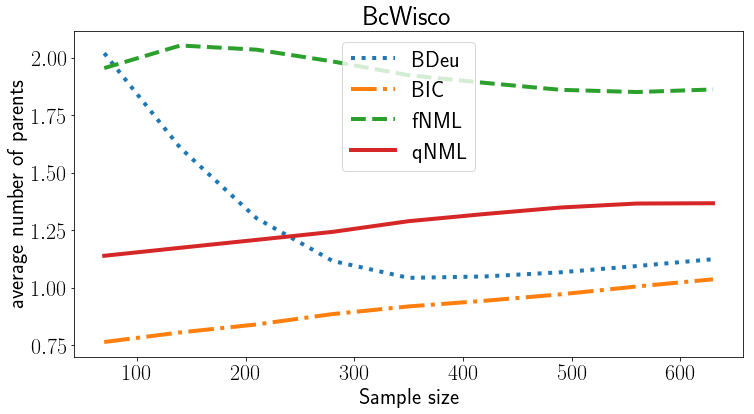

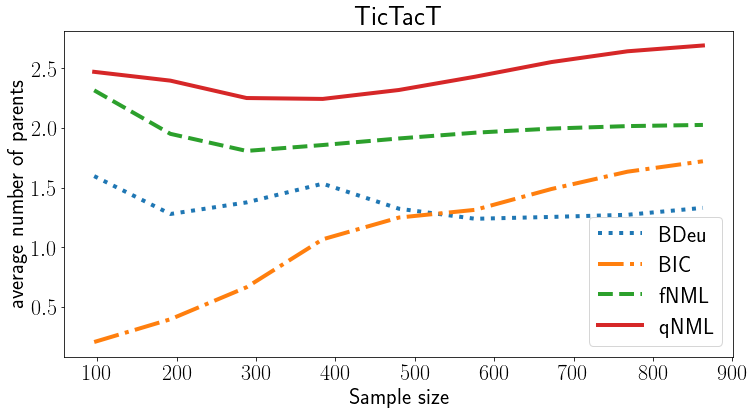

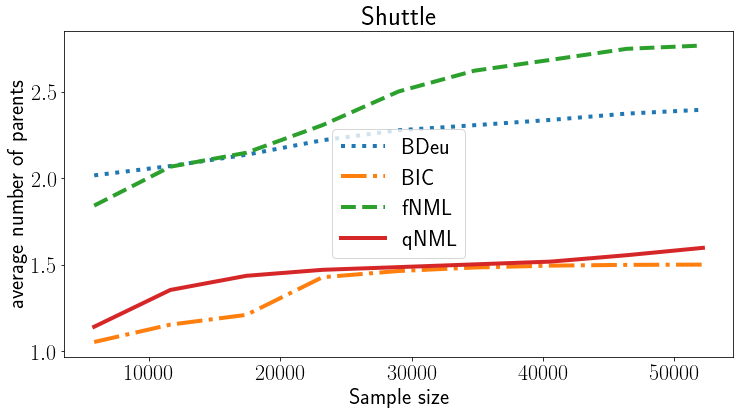

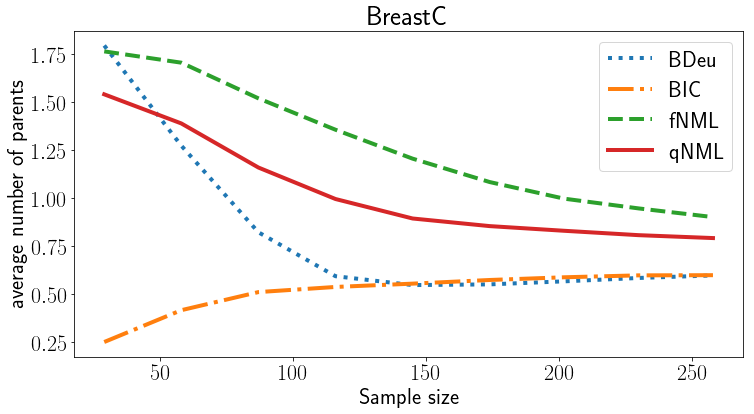

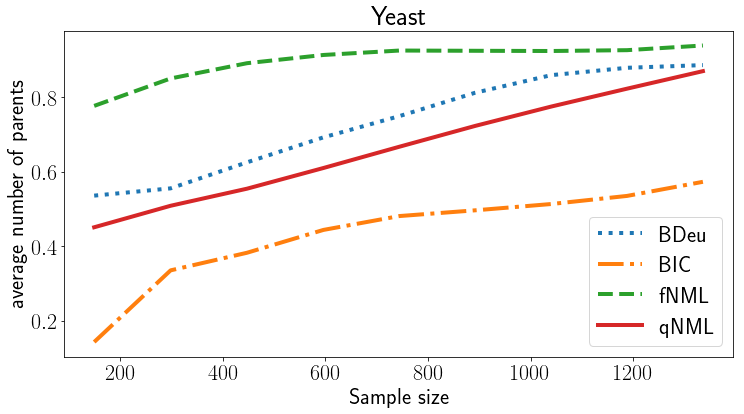

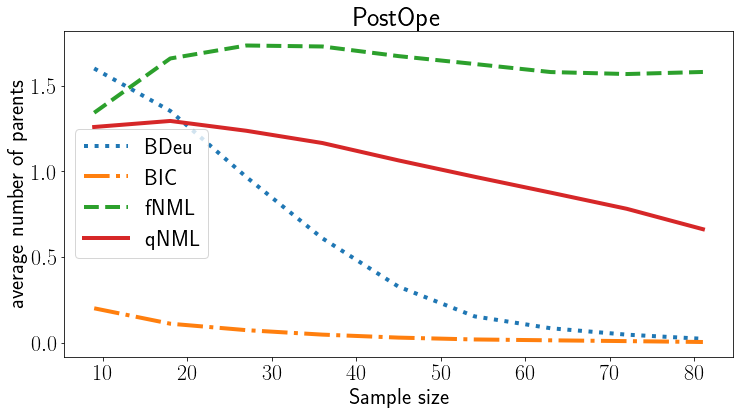

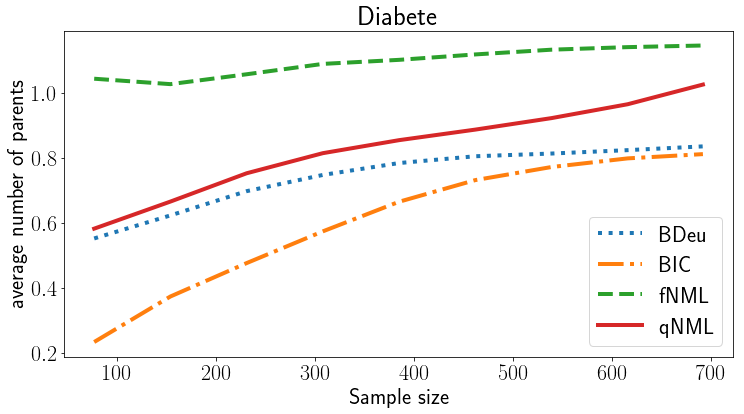

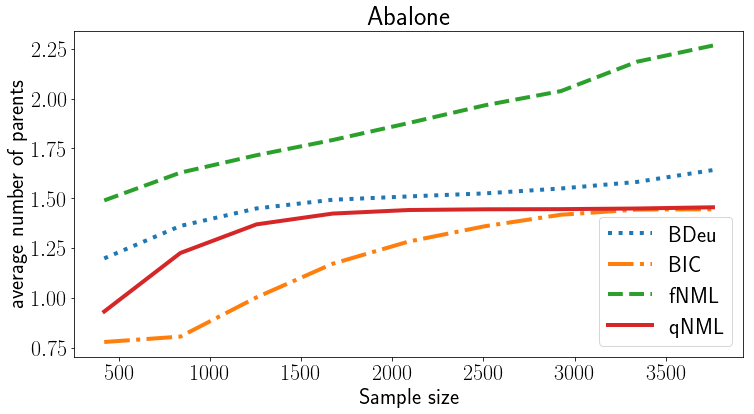

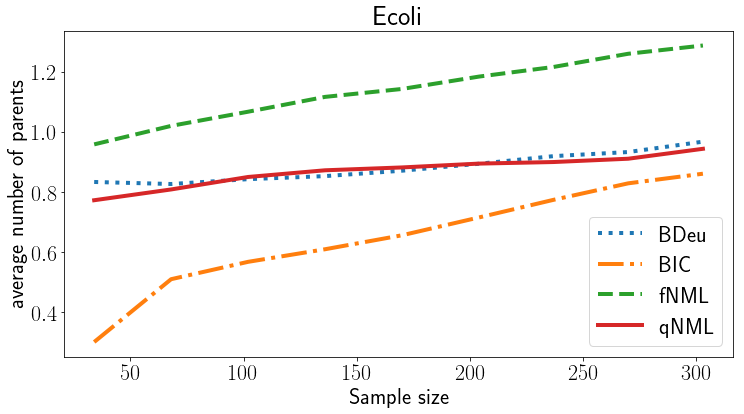

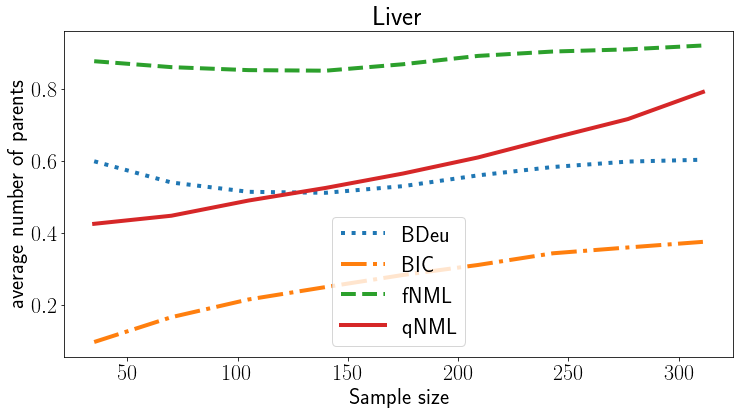

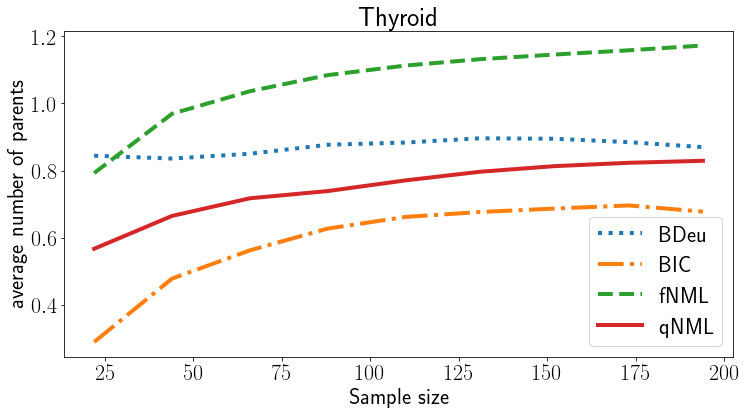

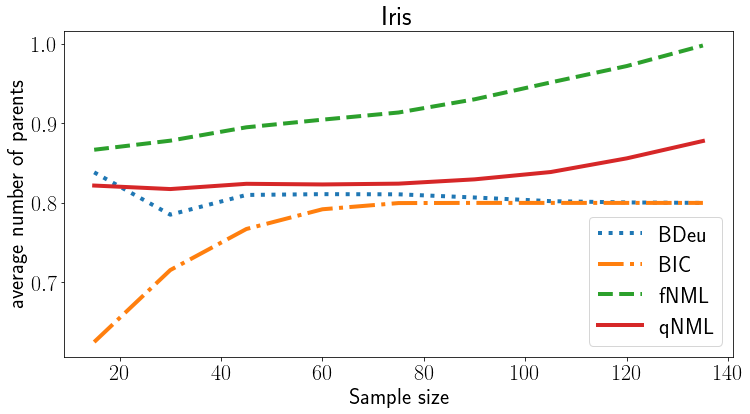

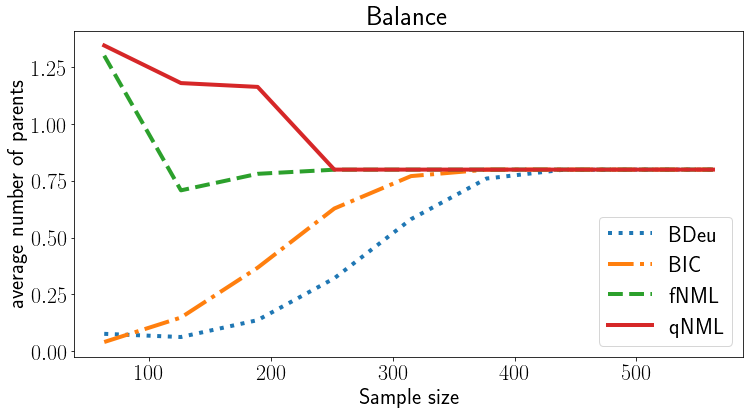

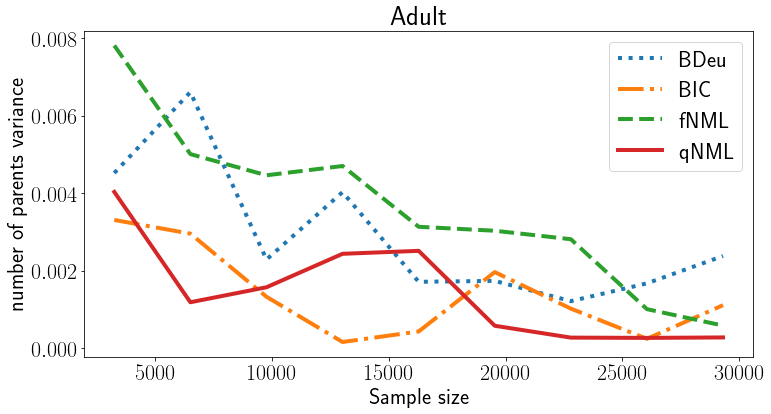

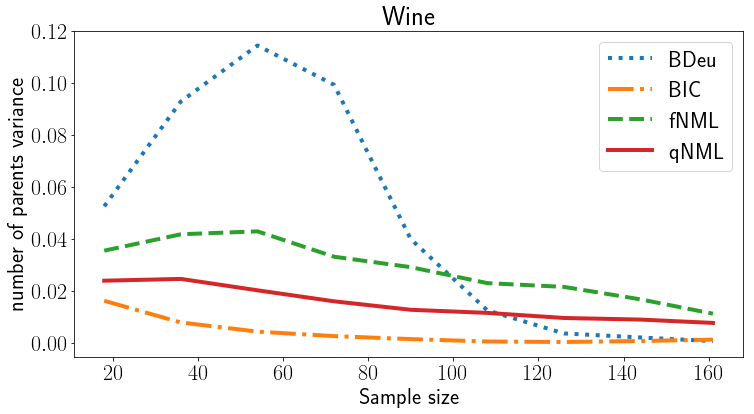

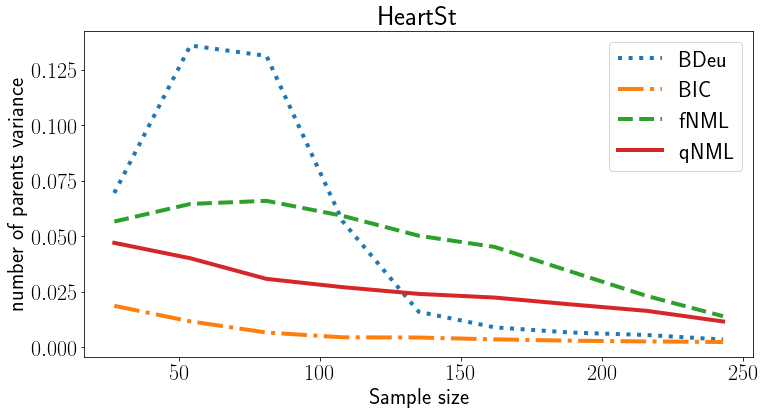

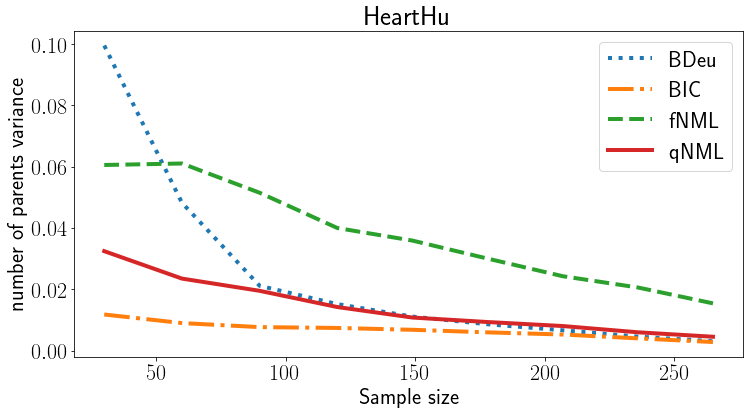

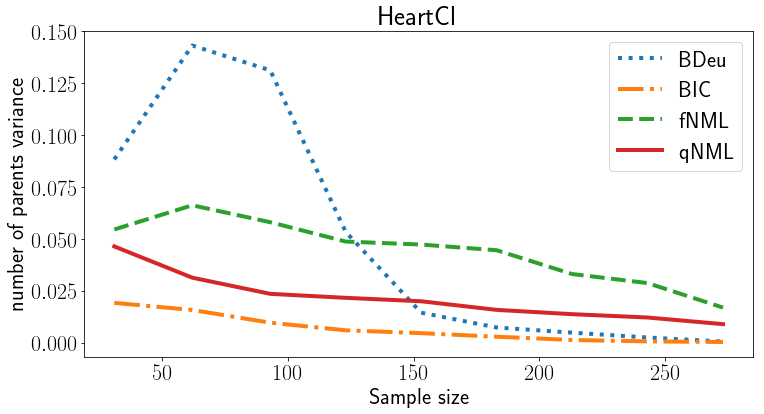

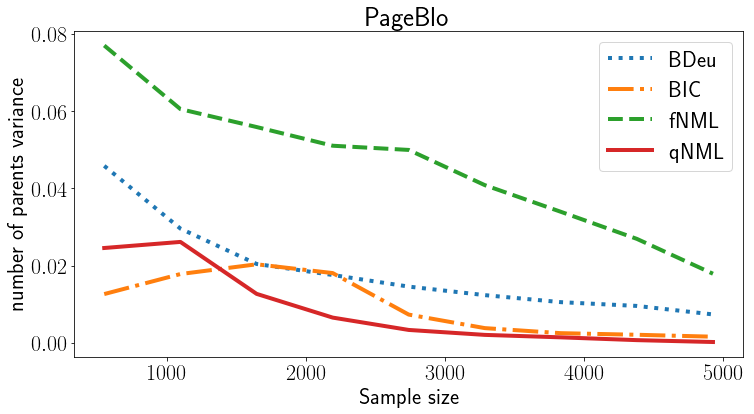

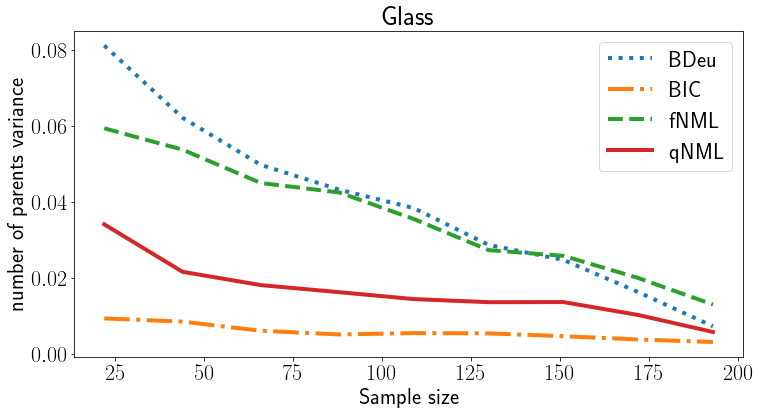

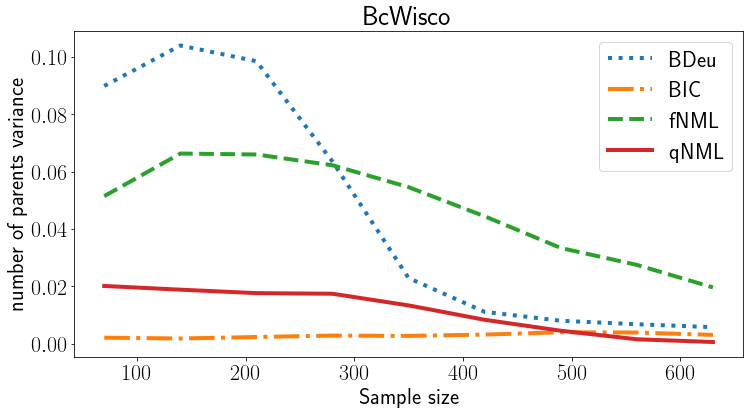

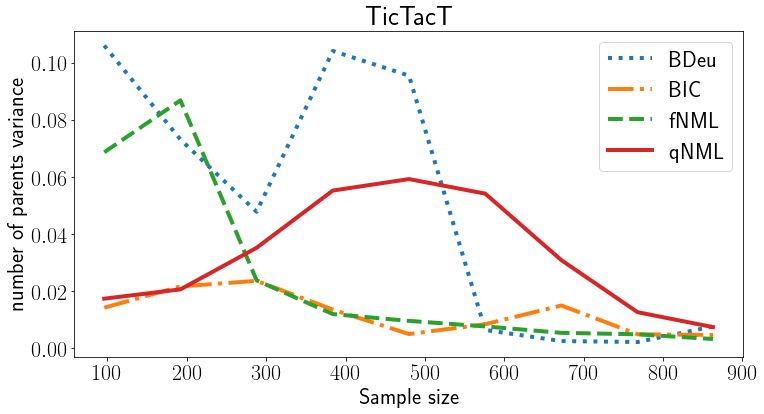

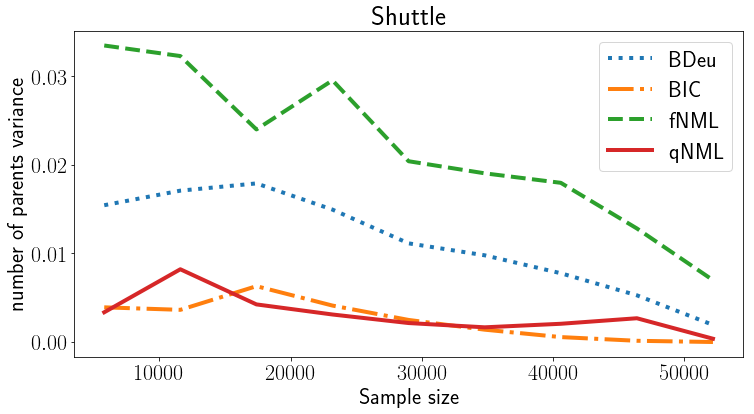

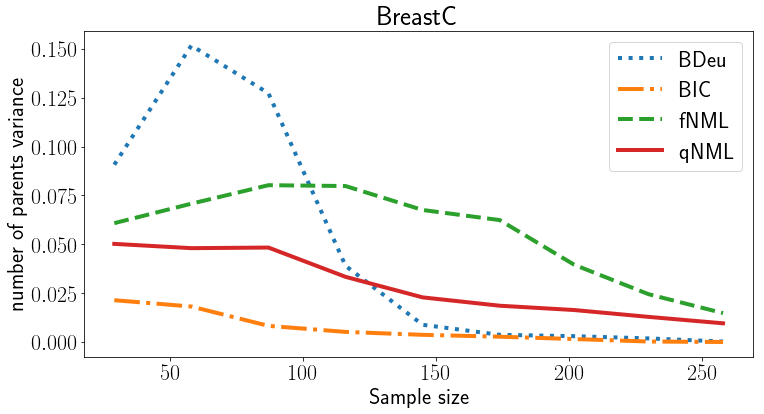

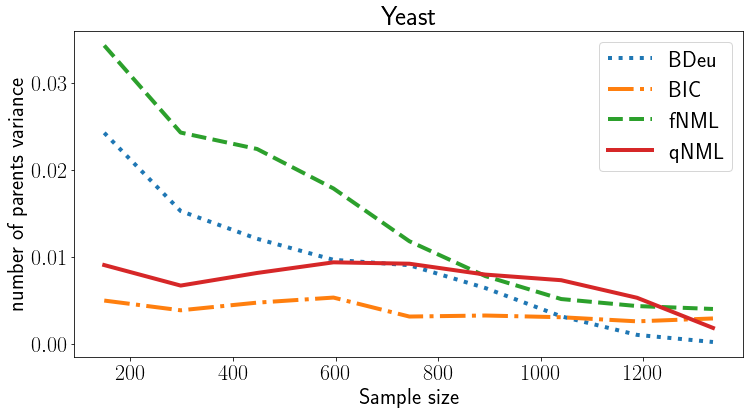

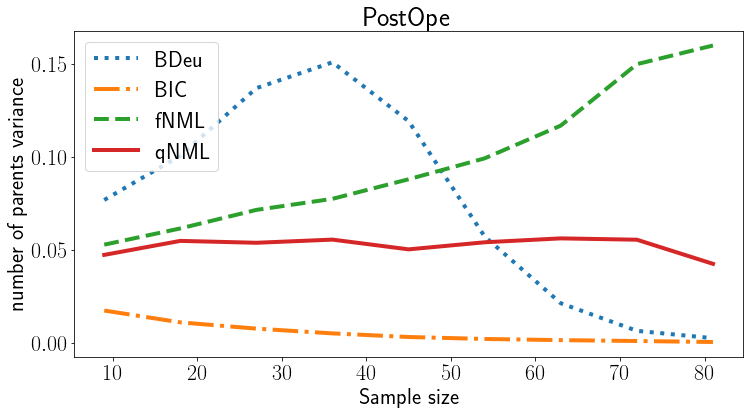

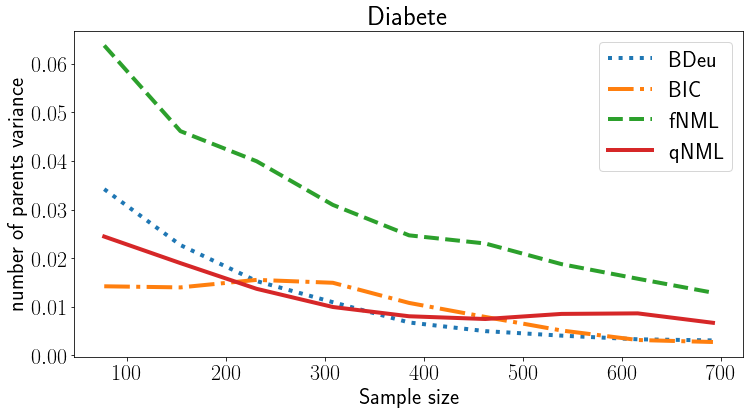

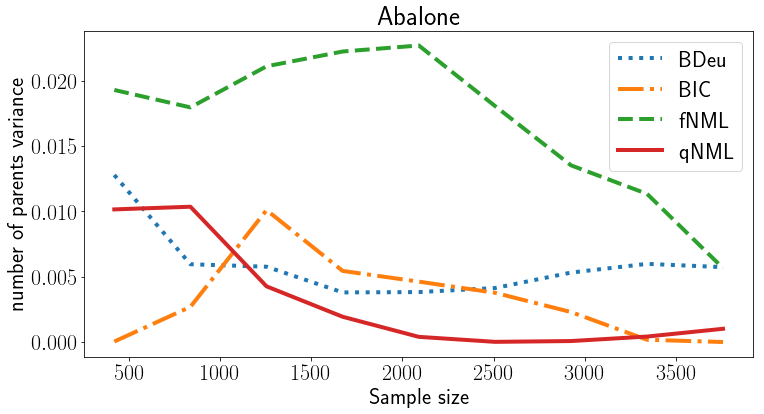

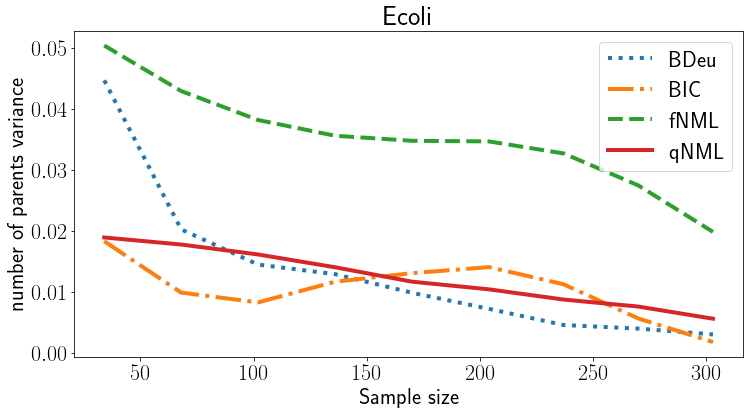

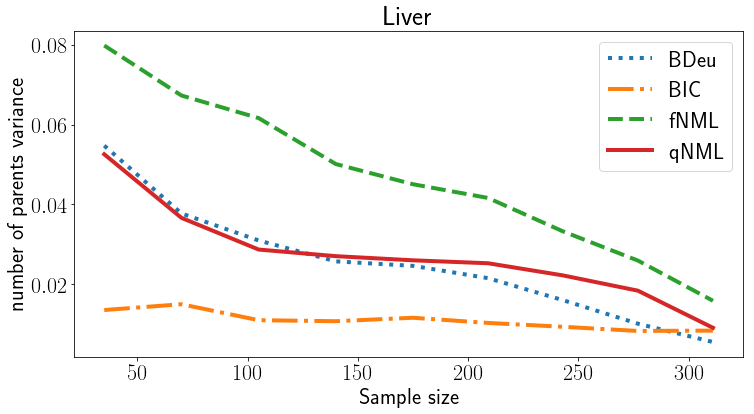

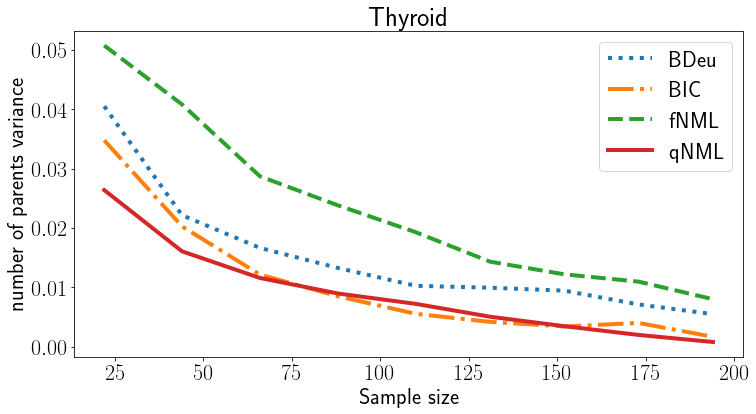

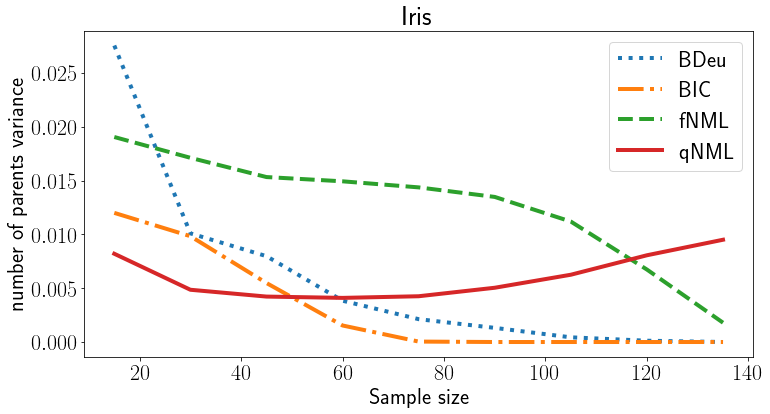

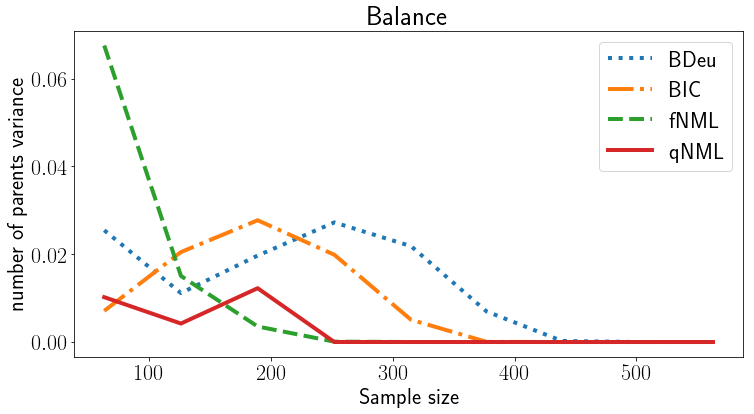

In [14]:
ss_image('average number of parents',4,np.mean,'parmean')
ss_image('number of parents variance',4,np.var,'parvar')

## Producing table of results

In [177]:
sstarget4dn = dict([('adult', 5000),
 ('wine', 30),
 ('heart_statlog', 50),
 ('heart_hungarian', 50),
 ('heart_cleveland', 50),
 ('page_blocks', 500),
 ('glass', 50),
 ('bc_wisconsin', 100),
 ('tic_tac_toe', 100),
 ('shuttle', 500),
 ('breast_cancer', 50),
 ('yeast', 200),
 ('post_operative', 20),
 ('diabetes', 100),
 ('abalone', 500),
 ('ecoli', 50),
 ('liver', 50),
 ('thyroid', 50),
 ('iris', 20),
 ('balance', 100)])

def gen_ss4dn():

    for dn,sst in sstarget4dn.items():
        sss = get_sample_sizes(dn)
        # sss = np.array([l.split()[0] for l in open(os.path.join('res_qNML','fNML',dn,'100.ssp'))],dtype=int)
        print
        ssds = np.abs(sss-sst)
        yield dn, sss[ssds.argmin()]
    
ss4dn = dict(gen_ss4dn())
ss4dn


{'abalone': 418,
 'adult': 6513,
 'balance': 126,
 'bc_wisconsin': 70,
 'breast_cancer': 58,
 'diabetes': 77,
 'ecoli': 34,
 'glass': 44,
 'heart_cleveland': 62,
 'heart_hungarian': 60,
 'heart_statlog': 54,
 'iris': 15,
 'liver': 35,
 'page_blocks': 548,
 'post_operative': 18,
 'shuttle': 5800,
 'thyroid': 44,
 'tic_tac_toe': 96,
 'wine': 36,
 'yeast': 149}

In [178]:
def datainfo(dn):
    ff = os.path.join(datad,dn,dn+'.vd')
    df = os.path.join(datad,dn,dn+'.idt')
    return len(open(ff).readlines()),len(open(df).readlines())

data2nN = dict((dn,datainfo(dn)) for dn in datanames)

data2nN

{'abalone': (9, 4177),
 'adult': (15, 32561),
 'balance': (5, 625),
 'bc_wisconsin': (11, 699),
 'breast_cancer': (10, 286),
 'diabetes': (9, 768),
 'ecoli': (8, 336),
 'glass': (11, 214),
 'heart_cleveland': (14, 303),
 'heart_hungarian': (14, 294),
 'heart_statlog': (14, 270),
 'iris': (5, 150),
 'liver': (7, 345),
 'page_blocks': (11, 5473),
 'post_operative': (9, 90),
 'shuttle': (10, 58000),
 'thyroid': (6, 215),
 'tic_tac_toe': (10, 958),
 'wine': (14, 178),
 'yeast': (9, 1484)}

In [179]:


dnN = sorted([(dn,n,N) for dn,(n,N) in data2nN.items()], key=lambda x:x[2])

#frame = pd.DataFrame([(fmt_dn(dn),n,N) for dn,n,N in dnN], columns=["Data", "n", "N"])

sorted_dnames = [fmt_dn(dn) for dn,n,N in dnN]
print(sorted_dnames)
print([dn for dn,n,N in dnN])

#f=open("datainfo.tex","wb")
#f.write(frame.to_latex(index=False,escape=False))
#f.close()

['PostOpe', 'Iris', 'Wine', 'Glass', 'Thyroid', 'HeartSt', 'BreastC', 'HeartHu', 'HeartCl', 'Ecoli', 'Liver', 'Balance', 'BcWisco', 'Diabete', 'TicTacT', 'Yeast', 'Abalone', 'PageBlo', 'Adult', 'Shuttle']
['post_operative', 'iris', 'wine', 'glass', 'thyroid', 'heart_statlog', 'breast_cancer', 'heart_hungarian', 'heart_cleveland', 'ecoli', 'liver', 'balance', 'bc_wisconsin', 'diabetes', 'tic_tac_toe', 'yeast', 'abalone', 'page_blocks', 'adult', 'shuttle']


In [180]:
import pandas as pd
    
def boldformat(xs,fmt):
    minx = min(xs)
    return [fmt%x if x>minx else "\\textbf{%s}"%fmt%x for x in xs]

def colformat(xs,fmt):
    sxs = sorted(range(len(xs)),key=lambda i:xs[i]) #sorted column indices
    colrank =  dict(zip(sxs,range(len(sxs))))
    r2fmt = {0:"\\textbf{%s}"%fmt, 1:"\underline{%s}"%fmt, 2:fmt, 3:"\textit{%s}"%fmt}
    return [r2fmt[colrank[i]]%x for i,x in enumerate(xs)]

#def boldformat2(xs):
#    minx = min(xs)
#    return ["%d"%x if x>minx else "\\textbf{%d}"%x for x in xs]

def gen_resrow(dn,col,sign,fmt):
    ss = ss4dn[dn]
    means = []
    for st in scoretypes:
        ds = datas[(st,dn,col)]
        sss = get_sample_sizes(dn) 
        ssix = np.argwhere(sss==ss)
        means.append(sign*ds[:,ssix].mean())
    return [fmt_dn(dn),ss]+colformat(means,fmt)


In [181]:
def gen_ranks(dn,col,sign):
    ss = ss4dn[dn]
    means = []
    for st in scoretypes:
        ds = datas[(st,dn,col)]
        sss = get_sample_sizes(dn)
        ssix = np.argwhere(sss==ss)
        means.append(sign*ds[:,ssix].mean())
    stypes = [s for (m,s) in sorted(zip(means,scoretypes))]
    return [stypes.index(st)+1 for st in scoretypes]


In [182]:
sdnames = sorted(datanames, key=lambda x: ss4dn[x])
for dn in sdnames:
    print(gen_resrow(dn,3,-1,'%.2f'))

['Iris', 15, '\textit{3.61}', '3.56', '\\underline{3.50}', '\\textbf{3.47}']
['PostOpe', 18, '\textit{10.52}', '\\textbf{7.45}', '\\underline{8.35}', '8.39']
['Ecoli', 34, '\textit{6.27}', '6.16', '\\textbf{5.56}', '\\underline{5.63}']
['Liver', 35, '\textit{4.22}', '\\textbf{4.01}', '4.10', '\\underline{4.03}']
['Wine', 36, '\textit{16.41}', '\\textbf{11.27}', '12.07', '\\underline{11.86}']
['Glass', 44, '\textit{7.48}', '6.65', '\\textbf{6.37}', '\\underline{6.43}']
['Thyroid', 44, '2.92', '\textit{2.93}', '\\textbf{2.81}', '\\underline{2.83}']
['HeartSt', 54, '\textit{14.37}', '\\textbf{10.96}', '11.98', '\\underline{11.65}']
['BreastC', 58, '\textit{11.21}', '\\textbf{9.94}', '\\underline{10.34}', '10.37']
['HeartHu', 60, '\textit{9.21}', '\\textbf{8.38}', '8.80', '\\underline{8.61}']
['HeartCl', 62, '\textit{14.88}', '\\textbf{11.76}', '12.48', '\\underline{12.18}']
['BcWisco', 70, '\textit{6.41}', '\\textbf{5.09}', '5.29', '\\underline{5.28}']
['Diabete', 77, '\textit{5.11}', '\\

In [183]:
import pandas as pd
restab = np.array([gen_resrow(dn,3,-1,'%.2f') for dn in sdnames])
frame = pd.DataFrame(restab, columns=["Data", "N"]+scoretypes)
frame

Data     N              BDeu               BIC               fNML  \
0      Iris    15     \textit{3.61}              3.56   \underline{3.50}   
1   PostOpe    18    \textit{10.52}     \textbf{7.45}   \underline{8.35}   
2     Ecoli    34     \textit{6.27}              6.16      \textbf{5.56}   
3     Liver    35     \textit{4.22}     \textbf{4.01}               4.10   
4      Wine    36    \textit{16.41}    \textbf{11.27}              12.07   
5     Glass    44     \textit{7.48}              6.65      \textbf{6.37}   
6   Thyroid    44              2.92     \textit{2.93}      \textbf{2.81}   
7   HeartSt    54    \textit{14.37}    \textbf{10.96}              11.98   
8   BreastC    58    \textit{11.21}     \textbf{9.94}  \underline{10.34}   
9   HeartHu    60     \textit{9.21}     \textbf{8.38}               8.80   
10  HeartCl    62    \textit{14.88}    \textbf{11.76}              12.48   
11  BcWisco    70     \textit{6.41}     \textbf{5.09}               5.29   
12  Diabete    77     \textit{5.11}  \underline{4.99}               5.09   
13  TicTacT    96             10.99    \textbf{10.35}  \underline{10.72}   
14  Balance   126              7.45  \underline{7.42}      \textbf{7.27}   
15    Yeast   149              5.67     \textit{5.80}      \textbf{5.48}   
16  Abalone   418  \underline{3.93}     \textit{4.00}      \textbf{3.88}   
17  PageBlo   548  \underline{2.36}     \textit{2.40}      \textbf{2.32}   
18  Shuttle  5800  \underline{1.69}     \textit{1.72}      \textbf{1.69}   
19    Adult  6513             10.16    \textit{10.25}     \textbf{10.05}   

                 qNML  
0       \textbf{3.47}  
1                8.39  
2    \underline{5.63}  
3    \underline{4.03}  
4   \underline{11.86}  
5    \underline{6.43}  
6    \underline{2.83}  
7   \underline{11.65}  
8               10.37  
9    \underline{8.61}  
10  \underline{12.18}  
11   \underline{5.28}  
12      \textbf{4.98}  
13     \textit{11.04}  
14      \textit{7.73}  
15   \underline{5.49}  
16               3.96  
17               2.38  
18               1.71  
19  \underline{10.08}

In [184]:
np.array([gen_ranks(dn,3,-1) for dn in datanames]).mean(axis=0)

array([ 3.45,  2.3 ,  1.9 ,  2.35])

In [185]:
frame.to_csv(os.path.join(tbldir,'qNMLpredtab.csv'))

In [186]:
f=open(os.path.join(tbldir,"qNMLpredtab.tex"),"w")
f.write(frame.to_latex(index=False,escape=False))
f.close()


In [187]:
restab = np.array([gen_resrow(dn,2,1,'%d') for dn in sdnames])
frame = pd.DataFrame(restab, columns=["Data", "N"]+scoretypes)
frame

Data     N             BDeu             BIC           fNML  \
0      Iris    15      \textit{37}     \textbf{22}             32   
1   PostOpe    18    \textit{1216}     \textbf{19}            396   
2     Ecoli    34     \textit{182}     \textbf{30}            162   
3     Liver    35               45     \textbf{15}    \textit{61}   
4      Wine    36   \textit{16483}     \textbf{70}            806   
5     Glass    44    \textit{1677}     \textbf{48}            505   
6   Thyroid    44               40     \textbf{23}    \textit{66}   
7   HeartSt    54   \textit{16861}     \textbf{43}           1109   
8   BreastC    58   \textit{25796}     \textbf{49}           3767   
9   HeartHu    60    \textit{1634}     \textbf{42}            791   
10  HeartCl    62   \textit{34366}     \textbf{47}           1413   
11  BcWisco    70    \textit{4630}     \textbf{42}            603   
12  Diabete    77               38     \textbf{22}   \textit{216}   
13  TicTacT    96   \textit{13700}     \textbf{25}           1968   
14  Balance   126      \textbf{20}  \underline{23}             48   
15    Yeast   149   \underline{71}     \textbf{31}   \textit{264}   
16  Abalone   418               91     \textbf{46}   \textit{149}   
17  PageBlo   548     \textit{681}     \textbf{44}            379   
18  Shuttle  5800              534     \textbf{99}   \textit{716}   
19    Adult  6513  \underline{699}    \textbf{477}  \textit{1554}   

               qNML  
0    \underline{29}  
1   \underline{146}  
2    \underline{77}  
3    \underline{23}  
4   \underline{204}  
5    \underline{97}  
6    \underline{28}  
7   \underline{256}  
8   \underline{843}  
9    \underline{90}  
10  \underline{404}  
11   \underline{89}  
12   \underline{34}  
13  \underline{766}  
14     \textit{611}  
15               75  
16   \underline{62}  
17   \underline{56}  
18  \underline{129}  
19              944

In [188]:
np.array([gen_ranks(dn,2,1) for dn in datanames]).mean(axis=0)

array([ 3.4 ,  1.05,  3.35,  2.2 ])

In [189]:
frame.to_csv(os.path.join(tbldir,"qNMLnptab.csv"))

In [190]:
f=open(os.path.join(tbldir,"qNMLnptab.tex"),"w")
f.write(frame.to_latex(index=False,escape=False))
f.close()


In [191]:
restab = np.array([gen_resrow(dn,4,1,'%.2f') for dn in sdnames])
frame = pd.DataFrame(restab, columns=["Data", "N"]+scoretypes)
frame

Data     N              BDeu               BIC           fNML  \
0      Iris    15              0.84     \textbf{0.63}  \textit{0.87}   
1   PostOpe    18              1.35     \textbf{0.11}  \textit{1.66}   
2     Ecoli    34              0.83     \textbf{0.30}  \textit{0.96}   
3     Liver    35              0.60     \textbf{0.10}  \textit{0.88}   
4      Wine    36     \textit{2.11}     \textbf{0.75}           1.86   
5     Glass    44              1.32     \textbf{0.38}  \textit{1.41}   
6   Thyroid    44              0.84     \textbf{0.48}  \textit{0.97}   
7   HeartSt    54              1.81     \textbf{0.56}  \textit{2.06}   
8   BreastC    58  \underline{1.27}     \textbf{0.42}  \textit{1.71}   
9   HeartHu    60  \underline{0.93}     \textbf{0.56}  \textit{1.55}   
10  HeartCl    62              1.69     \textbf{0.41}  \textit{1.96}   
11  BcWisco    70     \textit{2.02}     \textbf{0.76}           1.96   
12  Diabete    77  \underline{0.55}     \textbf{0.23}  \textit{1.04}   
13  TicTacT    96  \underline{1.60}     \textbf{0.21}           2.32   
14  Balance   126     \textbf{0.06}  \underline{0.15}           0.71   
15    Yeast   149              0.54     \textbf{0.14}  \textit{0.78}   
16  Abalone   418              1.20     \textbf{0.78}  \textit{1.49}   
17  PageBlo   548     \textit{1.67}     \textbf{0.38}           1.17   
18  Shuttle  5800     \textit{2.02}     \textbf{1.05}           1.84   
19    Adult  6513  \underline{1.34}     \textbf{1.11}  \textit{1.59}   

                qNML  
0   \underline{0.82}  
1   \underline{1.29}  
2   \underline{0.77}  
3   \underline{0.43}  
4   \underline{1.44}  
5   \underline{0.85}  
6   \underline{0.66}  
7   \underline{1.50}  
8               1.39  
9               1.04  
10  \underline{1.33}  
11  \underline{1.14}  
12              0.58  
13     \textit{2.47}  
14     \textit{1.18}  
15  \underline{0.45}  
16  \underline{0.93}  
17  \underline{0.49}  
18  \underline{1.14}  
19              1.36

In [192]:
np.array([gen_ranks(dn,2,1) for dn in datanames]).mean(axis=0)

array([ 3.4 ,  1.05,  3.35,  2.2 ])

In [193]:
frame.to_csv(os.path.join(tbldir,"qNMLpartab.csv"))
f=open(os.path.join(tbldir,"qNMLpartab.tex"),"w")
f.write(frame.to_latex(index=False,escape=False))
f.close()


In [194]:
print(frame)

       Data     N              BDeu               BIC           fNML  \
0      Iris    15              0.84     \textbf{0.63}  \textit{0.87}   
1   PostOpe    18              1.35     \textbf{0.11}  \textit{1.66}   
2     Ecoli    34              0.83     \textbf{0.30}  \textit{0.96}   
3     Liver    35              0.60     \textbf{0.10}  \textit{0.88}   
4      Wine    36     \textit{2.11}     \textbf{0.75}           1.86   
5     Glass    44              1.32     \textbf{0.38}  \textit{1.41}   
6   Thyroid    44              0.84     \textbf{0.48}  \textit{0.97}   
7   HeartSt    54              1.81     \textbf{0.56}  \textit{2.06}   
8   BreastC    58  \underline{1.27}     \textbf{0.42}  \textit{1.71}   
9   HeartHu    60  \underline{0.93}     \textbf{0.56}  \textit{1.55}   
10  HeartCl    62              1.69     \textbf{0.41}  \textit{1.96}   
11  BcWisco    70     \textit{2.02}     \textbf{0.76}           1.96   
12  Diabete    77  \underline{0.55}     \textbf{0.23}  \textit{1